# Exploratory Data Analysis

## Setup

In [517]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import urllib.request
import pandas as pd
import urllib
import tarfile
import os
import numpy as np
np.random.seed(42)
import sklearn
import seaborn as sns # importing seaborn for the heatmap
import sys
assert sys.version_info >= (3, 5) # Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB, ComplementNB, CategoricalNB, GaussianNB
from sklearn.cluster import KMeans 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from glob import glob 
import matplotlib.image as mpimg
from skimage.io import imread 
import tensorflow as tf
assert tf.__version__ >= "2.0"
from skimage import io
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, average_precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from tensorflow.keras.layers import (BatchNormalization, SeparableConv2D, Activation)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils


# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Reference- https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

# saving the figures; method can be used later
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Lab 2: Basics of Data Processing
Visualization and initial data exploration was done to gain insights on the data attributes. Data cleaning and pre-processing was also performed, along with appropriate visulaisations to give context to the data.


## Data Wrangling

In [382]:
data = pd.read_csv("student-por.csv")  # reading the csv file with the data

print(data.shape)  # to understand the dimensions of the dataset
# to display the number of rows/instances
print("rows = {}".format(data.shape[0]))
# to display the number of columns/attributes
print("columns = {}".format(data.shape[1]))

(649, 33)
rows = 649
columns = 33


In [383]:
data.head(10)  # to get a glimpse of the data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        4   0  11  11  
1  ...      5        3      3     1     1      3        2   9  11  11  
2  ...      4        3      2     2     3      3        6  12  13  12  
3  ...      3        2      2     1     1      5        0  14  14  14  
4  ...      4        3      2     1     2      5        0  11  13  13  
5  ...      5        4      2     1     2      5        6  12  12  13  
6  ...      4        4      4     1     1      3        0  13  12  13  
7  ...      4        1      4     1     1      1        2  10  13  13  
8  ...      4        2      2     1     1      1        0  15  16  17  
9  ...      5        5      1     1     1      5        0  12  12  13  

[10 rows x 33 columns]

In [384]:
data.tail(10)  # to get a glimpse of the data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
639     MS   M   19       R     GT3       T     1     1     other  services   
640     MS   M   18       R     GT3       T     4     2     other     other   
641     MS   F   18       R     GT3       T     2     2   at_home     other   
642     MS   F   17       U     GT3       T     4     3   teacher     other   
643     MS   F   18       R     GT3       T     4     4   teacher   at_home   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
639  ...      4        3      2     1     3      5        0   5   8   0  
640  ...      5        4      3     4     3      3        0   7   7   0  
641  ...      5        3      3     1     3      4        0  14  17  15  
642  ...      5        5      4     1     1      1        0   6   9  11  
643  ...      4        4      3     2     2      5        4   7   9  10  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[10 rows x 33 columns]

In [385]:
data.sample()  # returns a sample random row from the data frame

school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  \
636     MS   M   18       U     GT3       T     4     4  teacher  teacher   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
636  ...      3        2      4     1     4      2        4  17  18  19  

[1 rows x 33 columns]

In [386]:
data.info()  # to understand the attributes and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [387]:
data.describe()  # to view a summary of the descriptive statistics of the numerical attributes in the dataset

age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.051093    1.175766    0.924834    1.284380    1.446259   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  649.000000  649.000000  649.000000  649.000000  
mean     3.659476   11.399076   11.570108   11.906009  
std      4.640759    2.745265    2.913639    3.230656  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000   10.000000   10.000000   10.000000  
50%      2.000000   11.000000   11.000000   12.000000  
75%      6.000000   13.000000   13.000000   14.000000  
max     32.000000   19.000000   19.000000   19.000000

## Cleaning Data

In [388]:
data.isnull().sum().sum()  # to check for any null values in the dataset

0

In [389]:
data.duplicated().describe()  # one unique value of false means no duplicate value

count       649
unique        1
top       False
freq        649
dtype: object

In [390]:
# data.drop_duplicates() # we do not have duplicate values in our dataset as proved above

# Drops rows with null or missing values # we do not have null values
data.dropna()  # dropping missing values, if present in dataset

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        4   0  11  11  
1    ...      5        3      3     1     1      3        2   9  11  11  
2    ...      4        3      2     2     3      3        6  12  13  12  
3    ...      3        2      2     1     1      5        0  14  14  14  
4    ...      4        3      2     1     2      5        0  11  13  13  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[649 rows x 33 columns]

In [391]:
# renaming the data columns appropriately for our understanding
data.rename(columns={
    'famsize': 'fam_size',
    'Pstatus': 'parent_status',
    'Medu': 'mom_edu',
    'Fedu': 'dad_edu',
    'Mjob': 'mom_job',
    'Fjob': 'dad_job',
    'schoolsup': 'school_support',
    'famsup': 'fam_support',
    'paid': 'paid_class',
    'higher': 'higher_edu',
    'romantic': 'romantic_relations',
    'famrel': 'fam_relations',
    'goout': 'outings',
    'Dalc': 'workday_alcohol',
    'Walc': 'weekend_alcohol'
},inplace=True)

## Checking for Outliers or Invalid Data
#### Note: These attributes- mom_edu, dad_edu, traveltime, studytime, famrelations, freetime, outings, workday_alcohol, weekend_alcohol, and health are ordinal data but have been converted to numeric for analysis purposes. We are not checking for outliers but just for invalid values for these attributes. Ordinal values ranging from 1-5 are very low-very high.

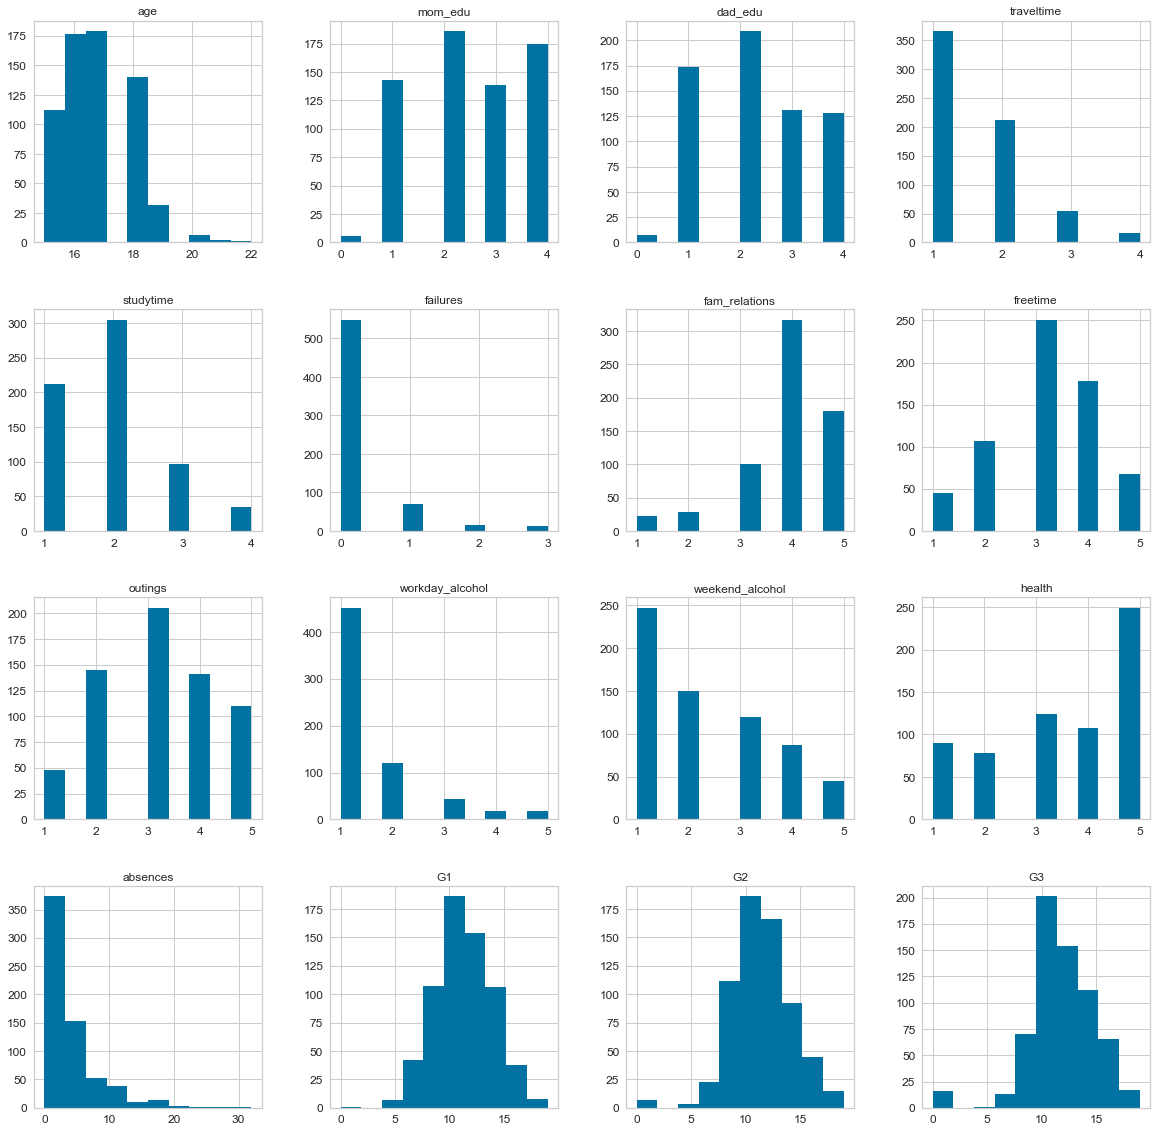

In [392]:
# To plot a histogram for each numerical attribute, aids in checking for nonsensical extreme values (invalid values) in attributes that were converted from ordinal to numeric.
data.hist(figsize=(20, 20))
plt.show()

    school sex  age address fam_size parent_status  mom_edu  dad_edu  \
279     GP   M   22       U      GT3             T        3        1   

      mom_job   dad_job  ... fam_relations freetime  outings  workday_alcohol  \
279  services  services  ...             5        4        5                5   

     weekend_alcohol health absences G1 G2 G3  
279                5      1       12  7  8  5  

[1 rows x 33 columns]


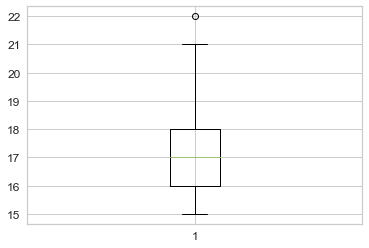

In [393]:
#Computing quantiles
age_Q1 = data["age"].quantile(0.25)
age_Q3 = data["age"].quantile(0.75)
age_IQR = age_Q3 - age_Q1  # Computing IQR

# Data points below the lower fence (Q1-1.5*IQR) and above the upper fence (Q3+1.5*IQR) are considered to be outliers.
age_outliers = data[(data["age"] < (age_Q1 - 1.5 * age_IQR))
                    | (data["age"] > (age_Q3 + 1.5 * age_IQR))]

print(age_outliers)  # to check out the outliers

# # Filtering Values between Q1-1.5IQR and Q3+1.5IQR, removing outliers from the dataset
# data = data[(data["age"]>=(age_Q1 - 1.5 * age_IQR)) & (data["age"]<=(age_Q3 + 1.5 * age_IQR))]
# We do not want the filter the data as we would like to consider the only person of 22 years of age for possible interesting correlations.
# We might want to reconsider our decision at a later point if required.

# Creating boxplot, dots representing data above the upper fence or below the lower fence represent outliers
age_plot = plt.boxplot(data["age"])
plt.show(age_plot)

In [394]:
# Data points above mean + 3*std and below mean + 3*std are considered outliers
upper_G1 = data["G1"].mean() + 3 * data["G1"].std()
lower_G1 = data["G1"].mean() - 3 * data["G1"].std()
print(upper_G1)
print(lower_G1)
data_1 = data[(data["G1"] < upper_G1) & (data["G1"] > lower_G1)]
print(data_1.shape)

upper_G2 = data_1["G2"].mean() + 3 * data_1["G2"].std()
lower_G2 = data_1["G2"].mean() - 3 * data_1["G2"].std()
print(upper_G2)
print(lower_G2)
data_2 = data_1[(data_1["G2"] < upper_G2) & (data_1["G2"] > lower_G2)]
print(data_2.shape)

# Using z-scores to find outliers, all data points with z-score above 3 and below -3 are said to be outliers
data_2['zscore'] = (data_2["G3"] - data_2["G3"].mean()) / data_2["G3"].std()
print(data_2[data_2["zscore"] > 3].shape)
# 9 values so they have been removed
print(data_2[data_2["zscore"] < -3].shape)

# new dataframe with no outliers
data_3 = data_2[(data_2['zscore'] > -3) & (data_2['zscore'] < 3)]

19.63487088610952
3.1632801154313093
(648, 33)
20.318397172480005
2.8235781361619683
(641, 33)
(0, 34)
(9, 34)


C:\Users\arizw\AppData\Local\Temp\ipykernel_3256\3805946291.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['zscore'] = (data_2["G3"] - data_2["G3"].mean()) / data_2["G3"].std()


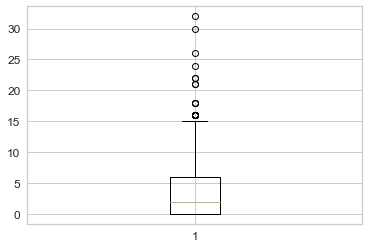

    school sex  age address fam_size parent_status  mom_edu  dad_edu  \
40      GP   F   16       U      LE3             T        2        2   
103     GP   F   15       U      GT3             T        3        2   
150     GP   F   15       U      GT3             A        3        3   
155     GP   M   17       U      GT3             T        2        1   
161     GP   M   16       U      GT3             T        4        4   
197     GP   F   17       U      LE3             T        3        3   
206     GP   M   17       U      GT3             T        1        2   
211     GP   M   16       R      LE3             T        3        3   
212     GP   F   17       U      GT3             T        4        4   
217     GP   F   17       R      GT3             T        2        2   
230     GP   F   17       U      GT3             T        4        3   
253     GP   F   18       U      LE3             A        2        4   
254     GP   F   18       U      LE3             T        2     

In [395]:
# Creating boxplots to check for outliers visually, dots representing data above the upper fence or below the lower fence represent outliers as explained already
absences_plot = plt.boxplot(data_3["absences"])
plt.show()

absences_Q1 = data_3["absences"].quantile(0.25)
absences_Q3 = data_3["absences"].quantile(0.75)
absences_IQR = absences_Q3 - absences_Q1  # Computing IQR

absences_outliers = data_3[(data_3["absences"] <
                           (absences_Q1 - 1.5 * absences_IQR))
                          | (data_3["absences"] >
                             (absences_Q3 + 1.5 * absences_IQR))]

print(absences_outliers)  # to check out the outliers

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR, making another dataset without outliers, to resuse outliers data in analysis if required
data4 = data_3[(data_3["absences"] >= (absences_Q1 - 1.5 * absences_IQR))
               & (data_3["absences"] <= (absences_Q3 + 1.5 * absences_IQR))]

In [396]:
print("For studytime")
# counts the occurences of values of each unique value in the column 'studytime'
print(data4['studytime'].value_counts())
# counts the occurences of each unique value in the column 'studytime'
print(data4['studytime'].value_counts().count())

print("For freetime")
# counts the occurences of values of each unique value in the column 'freetime'
print(data4['freetime'].value_counts())
# counts the occurences of each unique value in the column 'freetime'
print(data4['freetime'].value_counts().count())

print("\nFor failures-")
# counts the occurences of values of each unique value in the column 'failures'
print(data4['failures'].value_counts())
# counts the occurences of each unique value in the column 'failures'
print(data4['failures'].value_counts().count())

For studytime
2    284
1    195
3     97
4     35
Name: studytime, dtype: int64
4
For freetime
3    233
4    170
2    102
5     61
1     45
Name: freetime, dtype: int64
5

For failures-
0    527
1     57
2     14
3     13
Name: failures, dtype: int64
4


In [397]:
# counts the occurences of values of each unique value in the column 'health'
print(data4['health'].value_counts())

# counts the occurences of values of each unique value in the column 'parent_status'- "T" - living together or "A" - apart
print(data4['parent_status'].value_counts())

5    234
3    115
4    104
1     85
2     73
Name: health, dtype: int64
T    540
A     71
Name: parent_status, dtype: int64


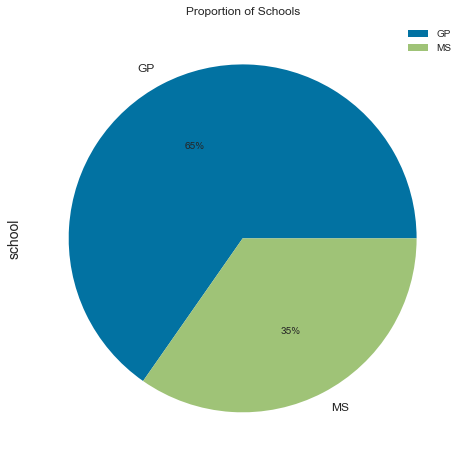

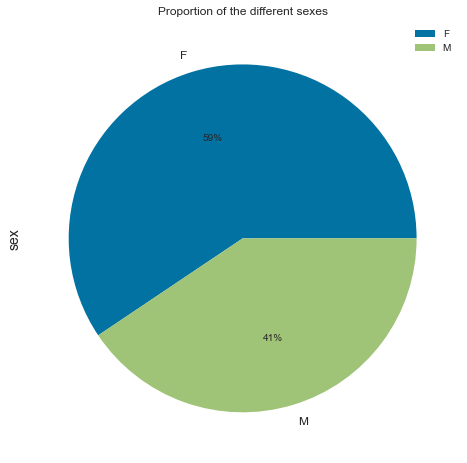

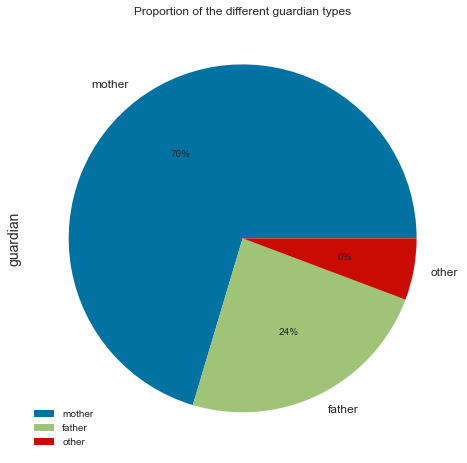

In [398]:
# Shows the proportion of schools mentioned; to confirm that there are no invalid values
plt.figure(figsize=(10, 8))
data4.school.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Proportion of Schools')
plt.legend()

# Shows the proportion of sexes mentioned; to confirm that there are no invalid values
plt.figure(figsize=(10,8))
data4.sex.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Proportion of the different sexes')
plt.legend()

# Shows the proportion of guardians types; to confirm that there are no invalid values
plt.figure(figsize=(10,8))
data4.guardian.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Proportion of the different guardian types')
plt.legend()

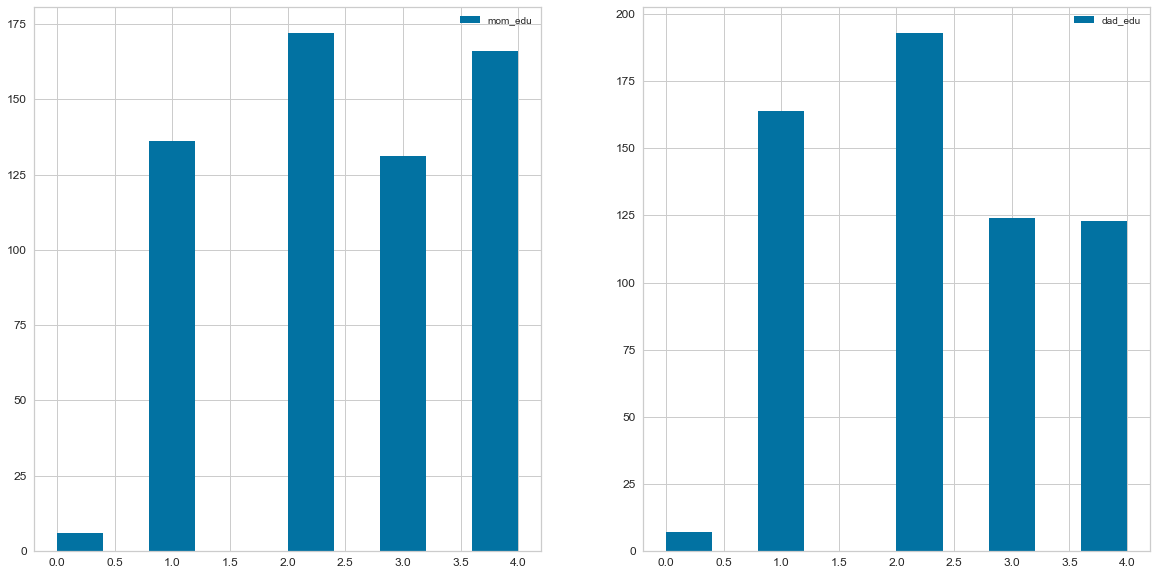

In [399]:
# To plot a histogram for visualizing and comparing mother's and father's education
fig, axes = plt.subplots(1, 2)
data4["mom_edu"].hist(legend='True', ax=axes[0], figsize=(20,10))
data4["dad_edu"].hist(legend='True', ax=axes[1], figsize=(20,10))
plt.show()

In [400]:
# counts the occurences of values of each unique value in the column 'mom_job'
data4['mom_job'].value_counts()
# counts the occurences of values of each unique value in the column 'dad_job'
data4['dad_job'].value_counts()

other       348
services    169
at_home      39
teacher      32
health       23
Name: dad_job, dtype: int64

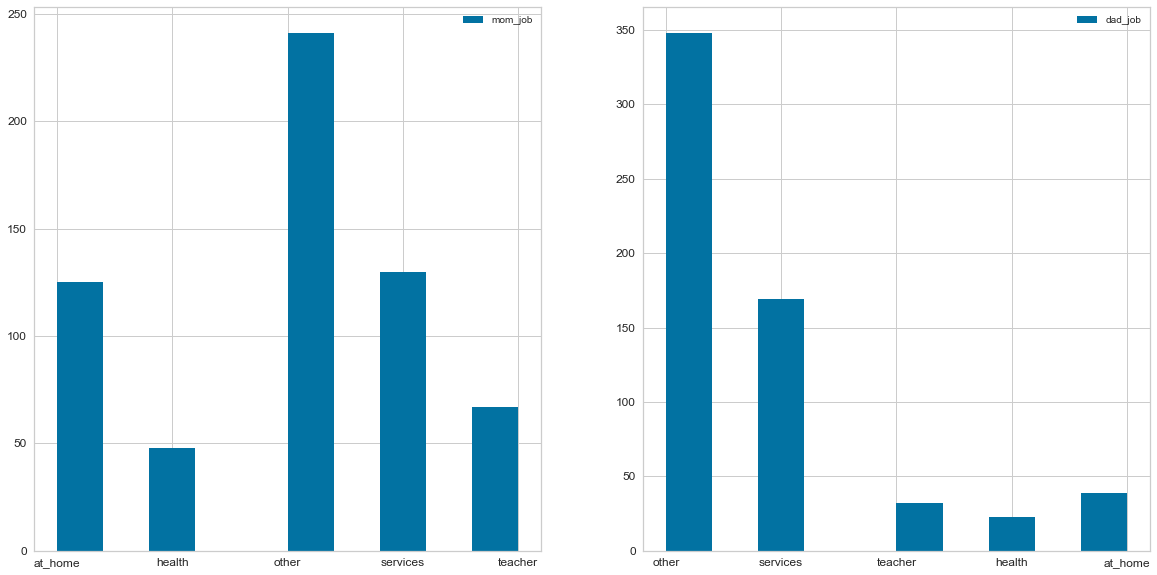

In [401]:
# To visualize the values of the mother's job and father's jobs
fig, axes = plt.subplots(1, 2)
data4["mom_job"].hist(legend='True', ax=axes[0], figsize=(20,10))
data4["dad_job"].hist(legend='True', ax=axes[1], figsize=(20,10))
plt.show()

<AxesSubplot:xlabel='address'>

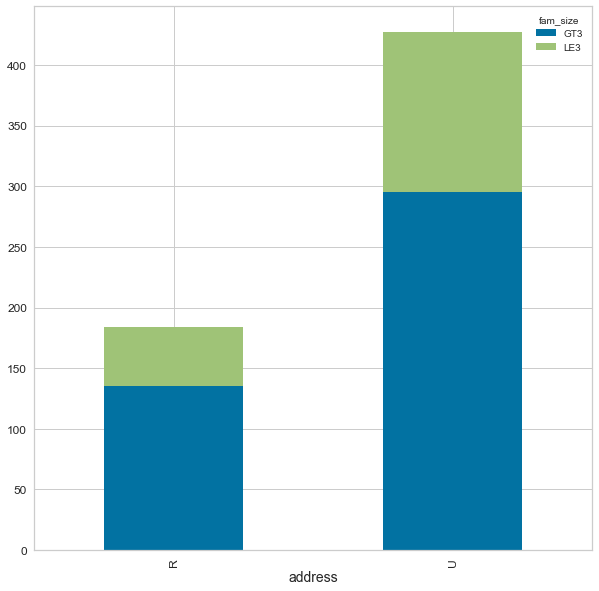

In [402]:
# Reference- https://stats.stackexchange.com/questions/520731/how-to-plot-binary-vs-categorical-nominal-data
# To visualize the relation between family size and the type of the address (urban(U) or rural(R))
pd.crosstab(data4['address'],data4['fam_size']).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:xlabel='fam_relations'>

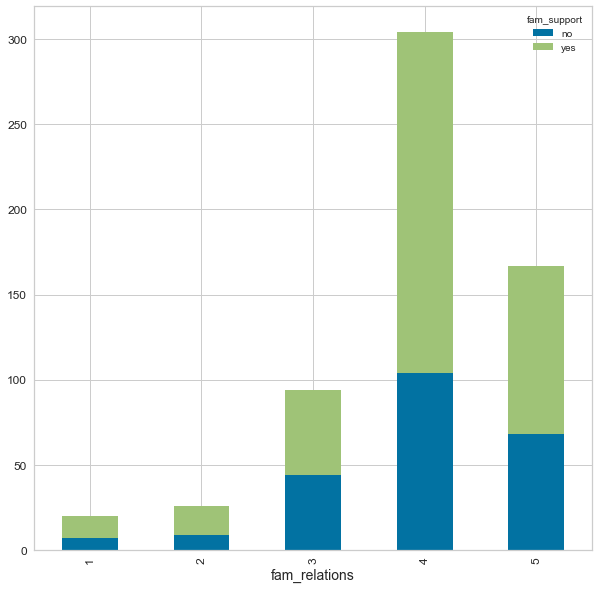

In [403]:
# To visualize the relation between level of family relation and the support from family
pd.crosstab(data4['fam_relations'],data4['fam_support']).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:xlabel='reason'>

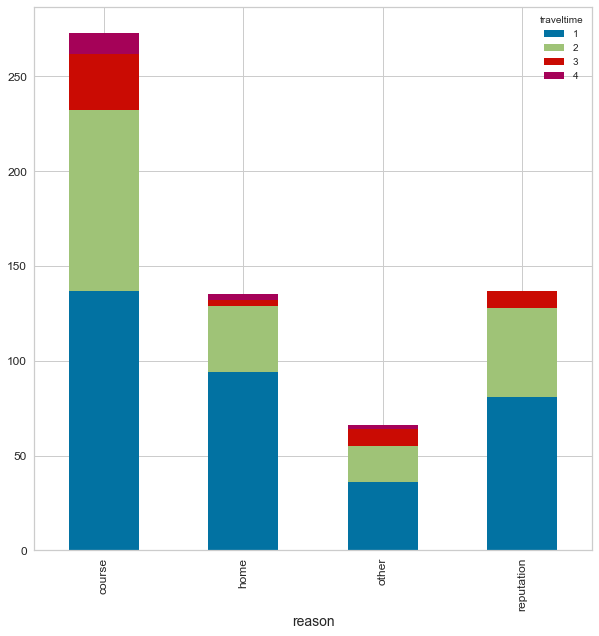

In [404]:
# To outline the relation between the reason for choosing the school v/s the travel time
pd.crosstab(data4['reason'],data4['traveltime']).plot.bar(stacked=True, figsize=(10,10))

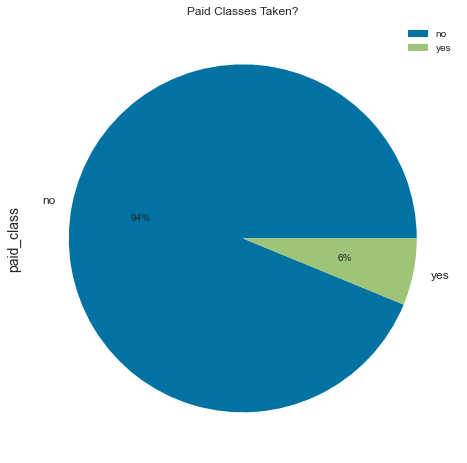

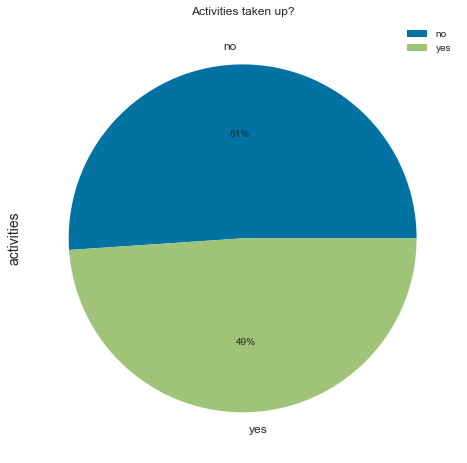

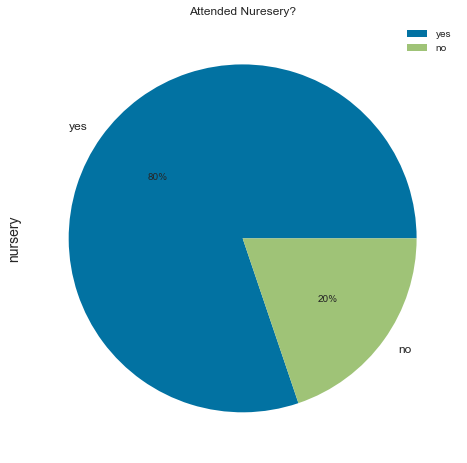

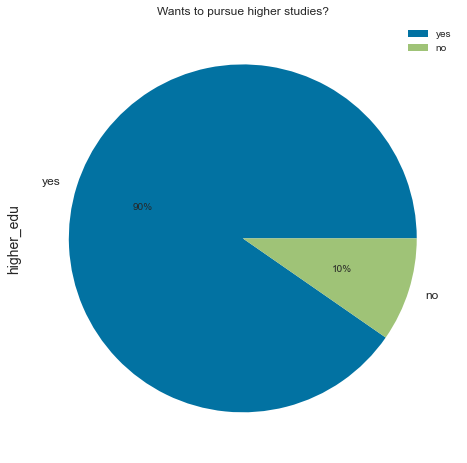

In [405]:
# To have pie charts with some attributes taking binary values
# paid classes for Math or Portuguese
plt.figure(figsize=(10, 8))
data4.paid_class.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Paid Classes Taken?')
plt.legend()

# takes part in other activities 
plt.figure(figsize=(10, 8))
data4.activities.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Activities taken up?')
plt.legend()

# attended nursery school (binary: yes or no)
plt.figure(figsize=(10, 8))
data4.nursery.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Attended Nuresery?')
plt.legend()

# higher - wants to take higher education (binary: yes or no)
plt.figure(figsize=(10, 8))
data4.higher_edu.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Wants to pursue higher studies?')
plt.legend()


In [406]:
# counts the occurences of values of each unique value in the column 'internet'- has access to or not
print(data4['internet'].value_counts())

# counts the occurences of values of each unique value in the column 'romantic_relations'- if they are in a romantic relationship or not
print(data4['romantic_relations'].value_counts())

# counts the occurences of values of each unique value in the column 'outings'- frequency of going out with friends
print(data4['outings'].value_counts())

yes    469
no     142
Name: internet, dtype: int64
no     392
yes    219
Name: romantic_relations, dtype: int64
3    196
2    140
4    133
5    100
1     42
Name: outings, dtype: int64


<AxesSubplot:xlabel='weekend_alcohol'>

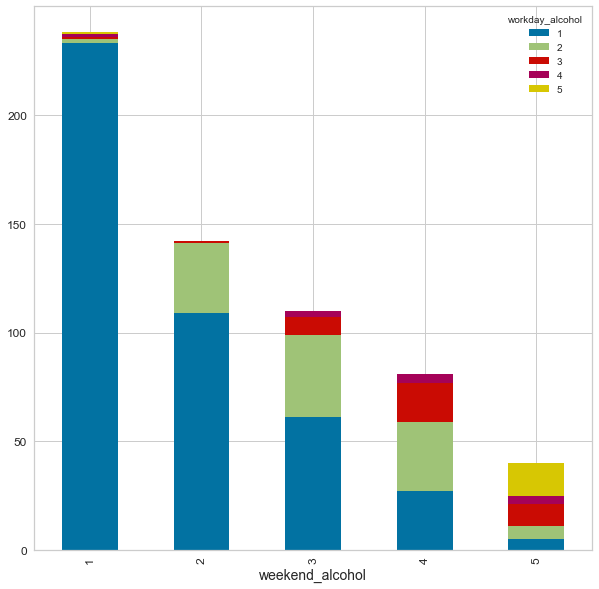

In [407]:
# To showcase the weekday and weekend alcohol consumption
pd.crosstab(data4['weekend_alcohol'],data4['workday_alcohol']).plot.bar(stacked=True, figsize=(10,10))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='absences', ylabel='G3'>

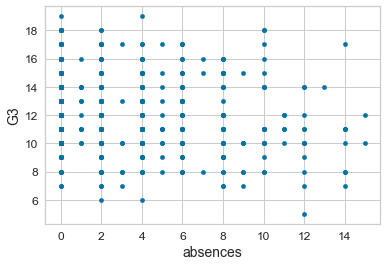

In [408]:
# To find a possible relationship between absences and final grade, before calculating the correlation matrix
data4.plot(kind="scatter", x="absences", y="G3")

The Exploratory Data Analysis (EDA) conducted gave valuable insights on the Student Peformance data, data was cleaned and pre-processed, outliers were filtered and certain areas of improvement were recognized. Continuous variables were converted into dicrete form through the process of dicretization. Normalization was performed on datasets with numerical features with widely disparate ranges, and the numerical summaries of attributes were generated and reported as observed.

# Lab 3: Feature Selection
We start this lab by feature engineering, a process of selecting a subset of relevant features from all the features used to make model building.
The standard correlation coefficient (Pearson’s r) method and the Chi-squared method for feature selection for categorical values was used in the following cells.

In [409]:
data4['avg_grade'] = (data4['G1']+data4['G2']+data4['G3'])/3 # to add an extra attribute- the average final grade
data4.head()

C:\Users\arizw\AppData\Local\Temp\ipykernel_3256\3837693695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['avg_grade'] = (data4['G1']+data4['G2']+data4['G3'])/3 # to add an extra attribute- the average final grade


school sex  age address fam_size parent_status  mom_edu  dad_edu   mom_job  \
1     GP   F   17       U      GT3             T        1        1   at_home   
2     GP   F   15       U      LE3             T        1        1   at_home   
3     GP   F   15       U      GT3             T        4        2    health   
4     GP   F   16       U      GT3             T        3        3     other   
5     GP   M   16       U      LE3             T        4        3  services   

    dad_job  ... outings workday_alcohol  weekend_alcohol  health  absences  \
1     other  ...       3               1                1       3         2   
2     other  ...       2               2                3       3         6   
3  services  ...       2               1                1       5         0   
4     other  ...       2               1                2       5         0   
5     other  ...       2               1                2       5         6   

   G1  G2  G3    zscore  avg_grade  
1   9  11  11 -0.345841  10.333333  
2  12  13  12 -0.012481  12.333333  
3  14  14  14  0.654237  14.000000  
4  11  13  13  0.320878  12.333333  
5  12  12  13  0.320878  12.333333  

[5 rows x 35 columns]

In [410]:
# Data was sorted into categorical bins of grades (A,B,C,D,E) accordingly
data4.sort_values(by=['avg_grade'])
bin_labels_5 = ['E', 'D', 'C', 'B', 'A']
data4['final_grade'] = pd.cut(x = data4['avg_grade'],
                              bins=[0, 11, 13, 15, 17, 20],
                              labels=bin_labels_5)
data4.head()

C:\Users\arizw\AppData\Local\Temp\ipykernel_3256\3545405366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['final_grade'] = pd.cut(x = data4['avg_grade'],


school sex  age address fam_size parent_status  mom_edu  dad_edu   mom_job  \
1     GP   F   17       U      GT3             T        1        1   at_home   
2     GP   F   15       U      LE3             T        1        1   at_home   
3     GP   F   15       U      GT3             T        4        2    health   
4     GP   F   16       U      GT3             T        3        3     other   
5     GP   M   16       U      LE3             T        4        3  services   

    dad_job  ... workday_alcohol weekend_alcohol  health  absences  G1  G2  \
1     other  ...               1               1       3         2   9  11   
2     other  ...               2               3       3         6  12  13   
3  services  ...               1               1       5         0  14  14   
4     other  ...               1               2       5         0  11  13   
5     other  ...               1               2       5         6  12  12   

   G3    zscore  avg_grade final_grade  
1  11 -0.345841  10.333333           E  
2  12 -0.012481  12.333333           D  
3  14  0.654237  14.000000           C  
4  13  0.320878  12.333333           D  
5  13  0.320878  12.333333           D  

[5 rows x 36 columns]

## Correlations

In [411]:
data4.drop(['zscore'], axis = 1, inplace = True) # dropping the z-scores calculated earlier before finding any correlations

C:\Users\arizw\AppData\Local\Temp\ipykernel_3256\1468635189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4.drop(['zscore'], axis = 1, inplace = True) # dropping the z-scores calculated earlier before finding any correlations


In [412]:
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# df = data4.select_dtypes(include=numerics)
# df.columns

# df["parent_edu"] = (df['mom_edu']+df['dad_edu'])/2 # to add an extra attribute
# df["alcohol_consump"] = (df['workday_alcohol']+df['weekend_alcohol'])/2 # to add an extra attribute

In [413]:
# Encoding categorical data using ordinal encoding
columns = data4.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
data4[columns] = ordinal_encoder.fit_transform(data4[columns])

C:\Users\arizw\AppData\Local\Temp\ipykernel_3256\861592521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4[columns] = ordinal_encoder.fit_transform(data4[columns])


In [414]:
data4.head()
df = data4.copy()

In [415]:
# dropping redundant columns
df.drop(['G1','G2','G3','avg_grade'], axis = 1, inplace = True)
df.head()

school  sex  age  address  fam_size  parent_status  mom_edu  dad_edu  \
1     0.0  0.0   17      1.0       0.0            1.0        1        1   
2     0.0  0.0   15      1.0       1.0            1.0        1        1   
3     0.0  0.0   15      1.0       0.0            1.0        4        2   
4     0.0  0.0   16      1.0       0.0            1.0        3        3   
5     0.0  1.0   16      1.0       1.0            1.0        4        3   

   mom_job  dad_job  ...  internet  romantic_relations  fam_relations  \
1      0.0      2.0  ...       1.0                 0.0              5   
2      0.0      2.0  ...       1.0                 0.0              4   
3      1.0      3.0  ...       1.0                 1.0              3   
4      2.0      2.0  ...       0.0                 0.0              4   
5      3.0      2.0  ...       1.0                 0.0              5   

   freetime  outings  workday_alcohol  weekend_alcohol  health  absences  \
1         3        3                1                1       3         2   
2         3        2                2                3       3         6   
3         2        2                1                1       5         0   
4         3        2                1                2       5         0   
5         4        2                1                2       5         6   

   final_grade  
1            E  
2            D  
3            C  
4            D  
5            D  

[5 rows x 31 columns]

In [416]:
# scaler = StandardScaler()
# # df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)


In [417]:
df.index = data4.index
df['final_grade'] = data4['final_grade']
df.head()

school  sex  age  address  fam_size  parent_status  mom_edu  dad_edu  \
1     0.0  0.0   17      1.0       0.0            1.0        1        1   
2     0.0  0.0   15      1.0       1.0            1.0        1        1   
3     0.0  0.0   15      1.0       0.0            1.0        4        2   
4     0.0  0.0   16      1.0       0.0            1.0        3        3   
5     0.0  1.0   16      1.0       1.0            1.0        4        3   

   mom_job  dad_job  ...  internet  romantic_relations  fam_relations  \
1      0.0      2.0  ...       1.0                 0.0              5   
2      0.0      2.0  ...       1.0                 0.0              4   
3      1.0      3.0  ...       1.0                 1.0              3   
4      2.0      2.0  ...       0.0                 0.0              4   
5      3.0      2.0  ...       1.0                 0.0              5   

   freetime  outings  workday_alcohol  weekend_alcohol  health  absences  \
1         3        3                1                1       3         2   
2         3        2                2                3       3         6   
3         2        2                1                1       5         0   
4         3        2                1                2       5         0   
5         4        2                1                2       5         6   

   final_grade  
1            E  
2            D  
3            C  
4            D  
5            D  

[5 rows x 31 columns]

In [418]:
# To find the most correlated features to class A, we replace all output labels 
#for class A with 1 and all other labels for classes B,C,D & E with 0.
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['A'],1)
df1['final_grade'] = df1['final_grade'].replace(['B', 'C', 'D', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
studytime             0.110850
mom_edu               0.101036
age                   0.068041
reason                0.062210
higher_edu            0.058570
address               0.055941
dad_job               0.053935
mom_job               0.038361
parent_status         0.035538
internet              0.031604
fam_size              0.007672
dad_edu               0.000251
health               -0.001506
fam_relations        -0.007877
workday_alcohol      -0.009388
school               -0.011736
weekend_alcohol      -0.013230
fam_support          -0.015263
school_support       -0.031232
outings              -0.035693
activities           -0.043343
freetime             -0.045681
paid_class           -0.046135
traveltime           -0.046965
sex                  -0.052072
failures             -0.062794
guardian             -0.065210
romantic_relations   -0.074917
nursery              -0.076595
absences             -0.086915
Name: final_grade, dtype: float64

<AxesSubplot:>

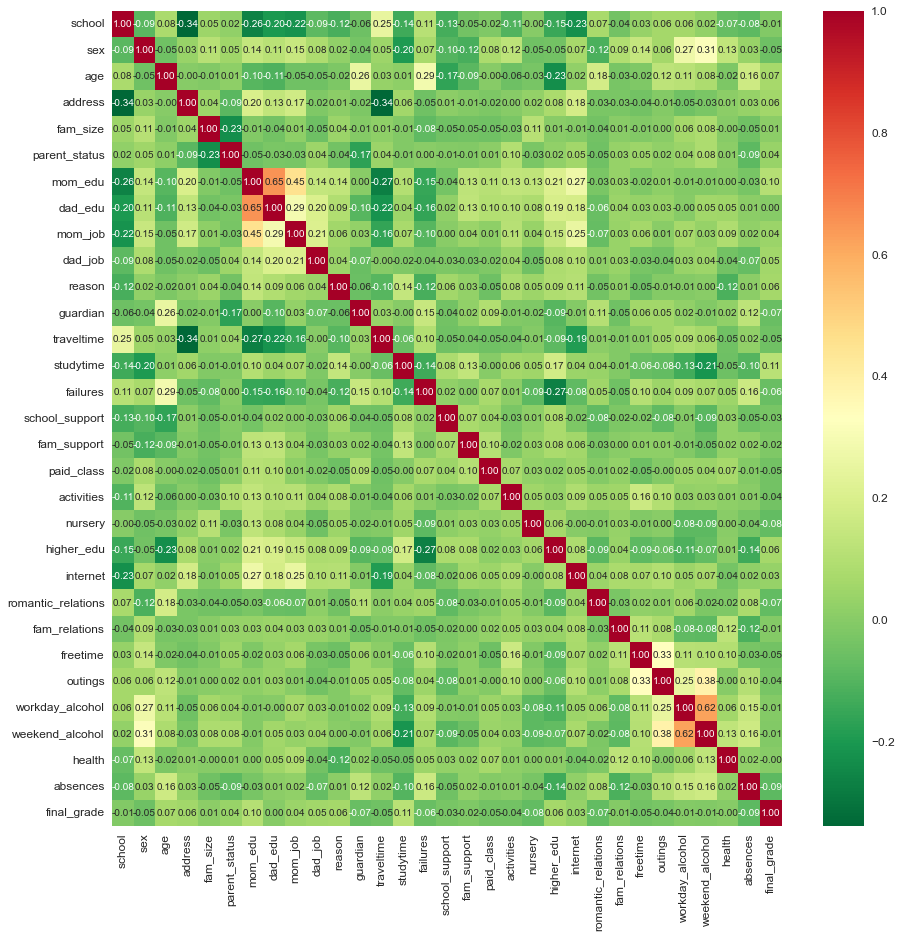

In [419]:
# plotting a heatmap to show the correlation
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [420]:
# To find the most correlated features to class B, we replace all output labels 
#for class A with 1 and all other labels for classes A,C,D & E with 0.
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['B'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'C', 'D', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
mom_edu               0.166827
dad_edu               0.138489
studytime             0.113783
higher_edu            0.100757
reason                0.092992
fam_relations         0.076416
dad_job               0.071685
nursery               0.065601
mom_job               0.065254
activities            0.047273
age                   0.042847
internet              0.031906
romantic_relations    0.024292
fam_support           0.013472
address               0.012178
fam_size              0.003814
guardian             -0.004211
outings              -0.022341
paid_class           -0.031211
parent_status        -0.033410
sex                  -0.041591
freetime             -0.047826
school               -0.053623
traveltime           -0.061736
health               -0.062528
absences             -0.065018
workday_alcohol      -0.082990
weekend_alcohol      -0.092853
school_support       -0.106336
failures             -0.108024
Name: final_grade, dtype: float64

<AxesSubplot:>

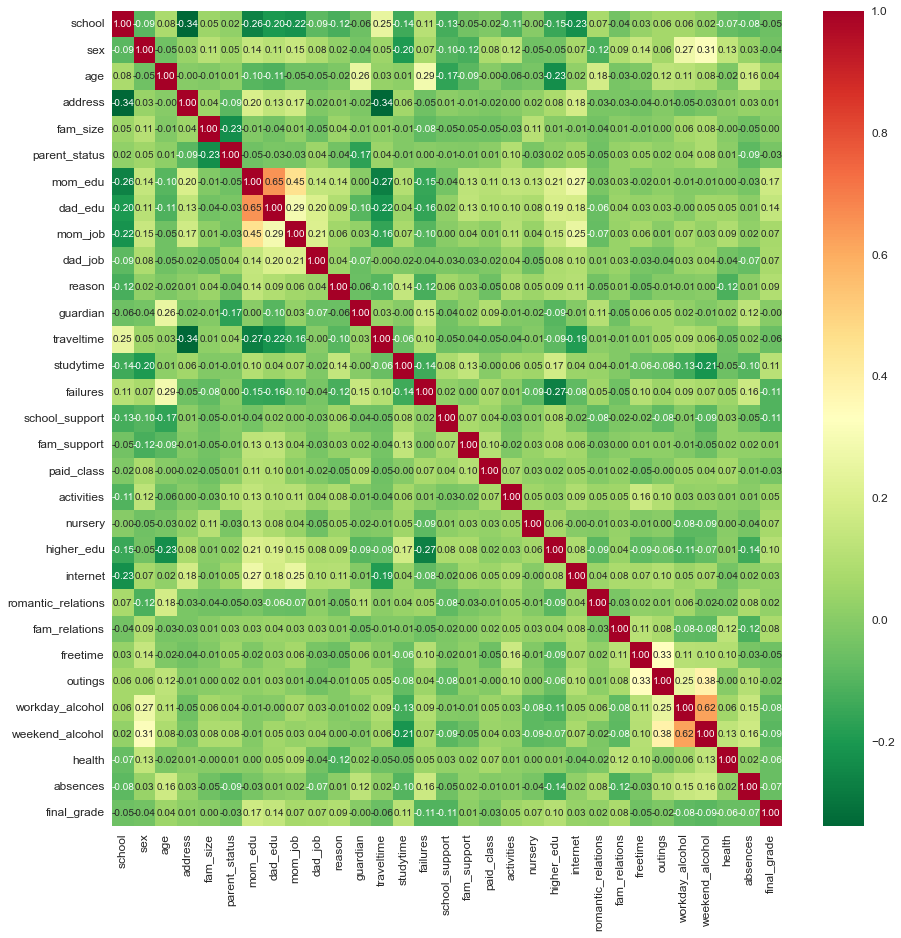

In [421]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [422]:
# To find the most correlated features to class c, we replace all output labels 
#for class A with 1 and all other labels for classes A,B,D & E with 0.
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['C'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'B', 'D', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
higher_edu            0.135150
mom_edu               0.122770
mom_job               0.117867
studytime             0.117668
dad_edu               0.104286
internet              0.098597
nursery               0.097521
address               0.084053
activities            0.070274
reason                0.048184
dad_job               0.030807
freetime              0.014964
fam_relations        -0.001074
fam_size             -0.003796
guardian             -0.006260
romantic_relations   -0.008954
parent_status        -0.009205
outings              -0.033211
fam_support          -0.033408
sex                  -0.053026
paid_class           -0.064293
absences             -0.070028
health               -0.072015
school_support       -0.073968
age                  -0.076271
traveltime           -0.086048
weekend_alcohol      -0.097352
school               -0.116034
workday_alcohol      -0.118555
failures             -0.145656
Name: final_grade, dtype: float64

<AxesSubplot:>

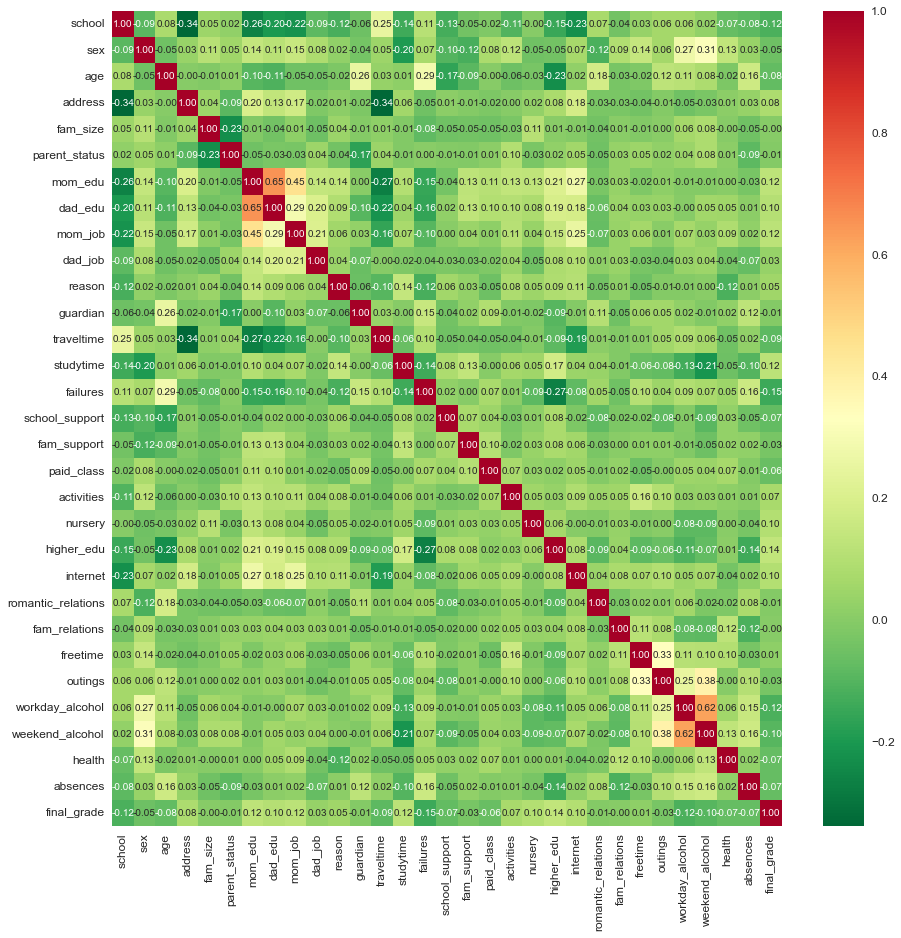

In [423]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [424]:
# To find the most correlated features to class D, we replace all output labels 
#for class A with 1 and all other labels for classes A,B,C & E with 0.
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['D'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'C', 'B', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
higher_edu            0.152606
address               0.110810
school_support        0.095187
paid_class            0.068015
mom_job               0.063002
fam_support           0.054057
dad_edu               0.049262
fam_relations         0.041886
activities            0.038777
internet              0.037047
mom_edu               0.028502
reason                0.025822
health                0.017724
studytime             0.007603
nursery               0.004298
dad_job               0.002092
fam_size             -0.008525
romantic_relations   -0.019643
parent_status        -0.026964
sex                  -0.034242
weekend_alcohol      -0.039017
outings              -0.044645
workday_alcohol      -0.057510
absences             -0.070543
freetime             -0.075141
traveltime           -0.076119
guardian             -0.080570
age                  -0.137878
failures             -0.178821
school               -0.204757
Name: final_grade, dtype: float64

<AxesSubplot:>

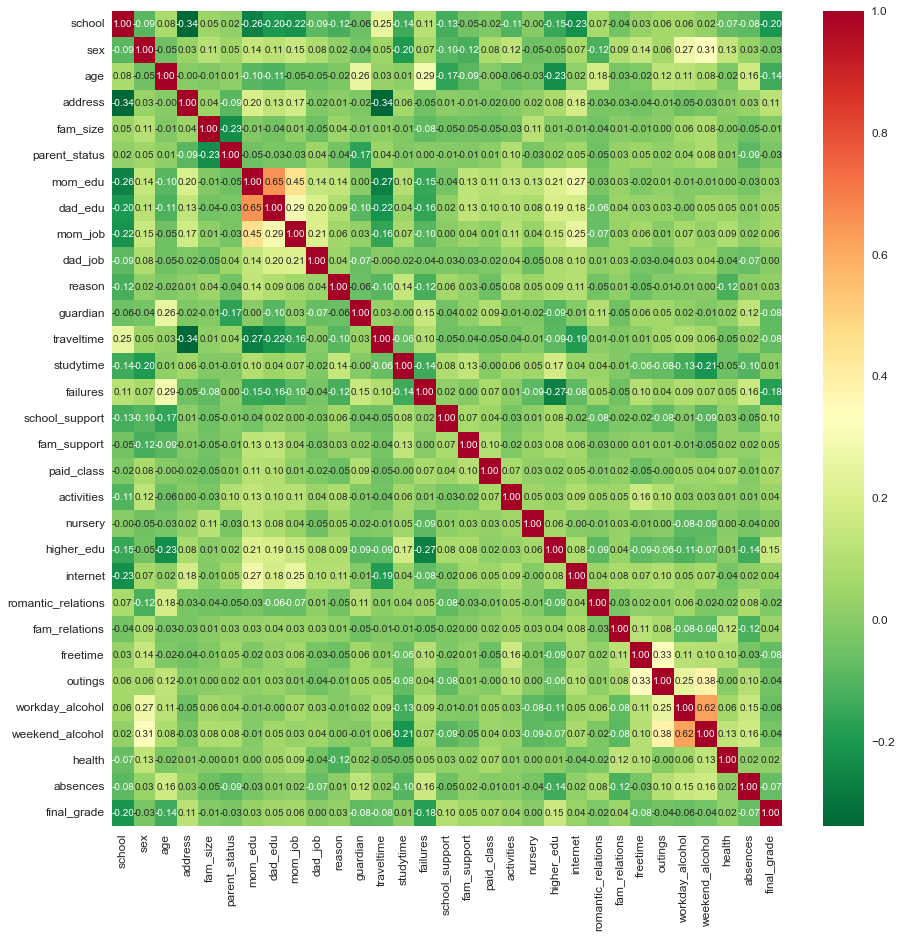

In [425]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [426]:
# To find the most correlated features to class E, we replace all output labels 
#for class A with 1 and all other labels for classes A,B,C,D with 0.
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['E'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'C', 'D', 'B'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

final_grade           1.000000
failures              0.356198
school                0.308174
workday_alcohol       0.193000
traveltime            0.186046
absences              0.184628
weekend_alcohol       0.167043
age                   0.134620
sex                   0.113332
guardian              0.102782
freetime              0.099595
outings               0.090902
health                0.075100
school_support        0.041951
parent_status         0.037915
romantic_relations    0.037032
paid_class            0.021629
fam_size              0.005744
fam_support          -0.025582
fam_relations        -0.077661
dad_job              -0.085068
nursery              -0.088862
activities           -0.100407
reason               -0.134786
internet             -0.138026
address              -0.190835
mom_job              -0.197509
studytime            -0.200305
dad_edu              -0.202977
mom_edu              -0.249778
higher_edu           -0.318886
Name: final_grade, dtype: float64

<AxesSubplot:>

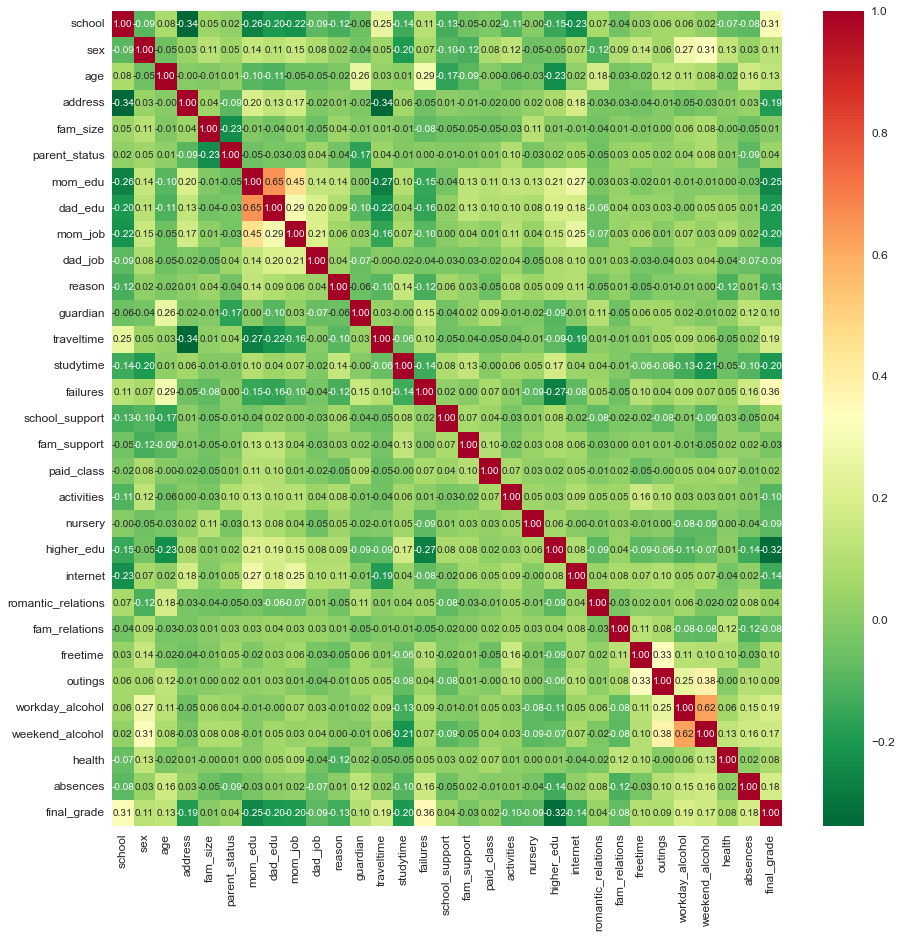

In [427]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [428]:
#Creating the table with top 2 correlating features
df_2 = df[['studytime','mom_edu','dad_edu','higher_edu','address','failures','school']]
df_2.head()

studytime  mom_edu  dad_edu  higher_edu  address  failures  school
1          2        1        1         1.0      1.0         0     0.0
2          2        1        1         1.0      1.0         0     0.0
3          3        4        2         1.0      1.0         0     0.0
4          2        3        3         1.0      1.0         0     0.0
5          2        4        3         1.0      1.0         0     0.0

In [429]:
#Creating the table with top 5 correlating features
df_5 = df[['studytime','mom_edu','dad_edu','age','reason','higher_edu','reason','mom_job','school_support','address','failures','paid_class','workday_alcohol','traveltime','absences']]
df_5.head()

studytime  mom_edu  dad_edu  age  reason  higher_edu  reason  mom_job  \
1          2        1        1   17     0.0         1.0     0.0      0.0   
2          2        1        1   15     2.0         1.0     2.0      0.0   
3          3        4        2   15     1.0         1.0     1.0      1.0   
4          2        3        3   16     1.0         1.0     1.0      2.0   
5          2        4        3   16     3.0         1.0     3.0      3.0   

   school_support  address  failures  paid_class  workday_alcohol  traveltime  \
1             0.0      1.0         0         0.0                1           1   
2             1.0      1.0         0         0.0                2           1   
3             0.0      1.0         0         0.0                1           1   
4             0.0      1.0         0         0.0                1           1   
5             0.0      1.0         0         0.0                1           1   

   absences  
1         2  
2         6  
3         0  
4         0  
5         6

In [430]:
#Creating the table with top 10 correlating features
df_10 = df[['studytime','mom_edu','dad_edu','age','sex','guardian','reason','higher_edu','reason','mom_job','dad_job','parent_status','internet','nursery','school','school_support','failures','address','paid_class','workday_alcohol','weekend_alcohol','traveltime','absences']]
df_10.head()

studytime  mom_edu  dad_edu  age  sex  guardian  reason  higher_edu  \
1          2        1        1   17  0.0       0.0     0.0         1.0   
2          2        1        1   15  0.0       1.0     2.0         1.0   
3          3        4        2   15  0.0       1.0     1.0         1.0   
4          2        3        3   16  0.0       0.0     1.0         1.0   
5          2        4        3   16  1.0       1.0     3.0         1.0   

   reason  mom_job  ...  nursery  school  school_support  failures  address  \
1     0.0      0.0  ...      0.0     0.0             0.0         0      1.0   
2     2.0      0.0  ...      1.0     0.0             1.0         0      1.0   
3     1.0      1.0  ...      1.0     0.0             0.0         0      1.0   
4     1.0      2.0  ...      1.0     0.0             0.0         0      1.0   
5     3.0      3.0  ...      1.0     0.0             0.0         0      1.0   

   paid_class  workday_alcohol  weekend_alcohol  traveltime  absences  
1         0.0                1                1           1         2  
2         0.0                2                3           1         6  
3         0.0                1                1           1         0  
4         0.0                1                2           1         0  
5         0.0                1                2           1         6  

[5 rows x 23 columns]

## Lab 4: Prepare Data for Classifier
We used ordinal encoder for binary values and one hot encoder for nominal values. 
Standard scalar was also used to normalize the numerical variables. 
We then encoded the target class and separated the features from the target column for all the top features. 

In [431]:
"""A function that applies transformer pipeline"""

# Use transformer pipline to apply normalization and encode the categorical variables
def transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns):
    transformers = [('numerical', StandardScaler(), numerical_columns), #standardScalar() is used to normalize all the numerical features in the dataframe 
                  ('nominal', OneHotEncoder(), nominal_columns),    #OneHotEncoder() allows the non-binary/ feature that do not follow an order to be encoded
                  ('binary_ordinal', OrdinalEncoder(), binary_ordinal_columns)]    #OrdinalEncoder() is used to encode the binar/ordinal features
    transformer_pipeline = ColumnTransformer(transformers, remainder='passthrough')
    df = pd.DataFrame(transformer_pipeline.fit_transform(df))
    return df
#We specifically don’t apply the OrdinalEncoder() to encode such methods because the ordinal encoder may force the model to assume an ordering between the values of this category, potentially resulting in poor performance.  


In [432]:

# 1. Prepare df for training - All features

df = data4 
#reference: https://www.kaggle.com/code/scratchpad/notebooke88af56e04/edit


#represent variables that are ordinal or binary - better suited to OrdinalEncoder()
binary_ordinal_columns = ['school', 'sex', 'address', 'fam_size', 'parent_status', 'school_support', 'fam_support',
       'paid_class', 'activities', 'nursery', 'higher_edu', 'internet', 'romantic_relations'] 

#represent variables that are nominal and not oridnal- better suited to OneHotEncoder()
nominal_columns = ['mom_job', 'dad_job', 'reason', 'guardian']

#represent numerical varibles (with mean and variance) - Normalize using StandardScalar()
numerical_columns = ['age','absences']

# Use transformer pipline to apply normalization and encode the categorical variables
new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)


#encode target class
le = LabelEncoder()
new_df[47] = le.fit_transform(new_df[47]) #final grade column 


#seperate features from target column
new_X = new_df.drop(columns=[47])
new_Y = new_df[47]

In [433]:
from sklearn.model_selection import train_test_split

# create a test - train split
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.25)

In [434]:
# 2. Prepare df2 - dataset with top 2 correlated features
df2 = data4[['studytime','mom_edu','dad_edu','higher_edu','address','failures','school']]

binary_ordinal_columns = ['school', 'address', 'higher_edu'] 

nominal_columns = []

numerical_columns = []

# Use transformer pipline to apply normalization and encode the categorical variables
new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)


#encode target class
le = LabelEncoder()
new_df[34] = le.fit_transform(new_df[34]) #final grade column 


#seperate features from target column
X_df2 = new_df.drop(columns=[34])
Y_df2 = new_df[34]

In [435]:
# create a test - train split for df2
df2_X_train, df2_X_test, df2_Y_train, df2_Y_test = train_test_split(X_df2, Y_df2, test_size=0.25)

In [436]:
# 3. Prepare df5 - data set with top 5 correlated features
df5 = data4[['studytime','mom_edu','dad_edu','age','reason','higher_edu','mom_job','school_support',
             'address','failures','paid_class','workday_alcohol','traveltime','absences']]

binary_ordinal_columns = ['address', 'school_support', 'paid_class', 'higher_edu'] 

nominal_columns = ['mom_job', 'reason',]

numerical_columns = ['age','absences']

# Use transformer pipline to apply normalization and encode the categorical variables
new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)

#encode target class
le = LabelEncoder()
new_df[41] = le.fit_transform(new_df[41]) #final grade column 


#seperate features from target column
X_df5 = new_df.drop(columns=[41])
Y_df5 = new_df[41]

In [437]:
# create a test - train split for df5
df5_X_train, df5_X_test, df5_Y_train, df5_Y_test = train_test_split(X_df5, Y_df5, test_size=0.25)

In [438]:
# 4. Use df 10 dataframe with 10 correlated features
df10 = data4 [['studytime','mom_edu','dad_edu','age','sex','guardian','reason','higher_edu','mom_job',
               'dad_job','parent_status','internet','nursery','school','school_support','failures','address','paid_class','workday_alcohol','weekend_alcohol','traveltime','absences']]


binary_ordinal_columns = ['school', 'sex', 'address', 'parent_status', 'school_support',
       'paid_class', 'nursery', 'higher_edu', 'internet'] 

nominal_columns = ['mom_job', 'dad_job', 'reason', 'guardian']

numerical_columns = ['age','absences']

new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)

le = LabelEncoder()
new_df[47] = le.fit_transform(new_df[47])  

#seperate features from target column
X_df10 = new_df.drop(columns=[47])
Y_df10 = new_df[47]

In [439]:
# create a test - train split for df10
df10_X_train, df10_X_test, df10_Y_train, df10_Y_test = train_test_split(X_df10, Y_df10, test_size=0.25)

## Train and Test the Classifier
We created an array of classifiers: Decision Tree, KNearestNeighbours, Random Forest Classifier, and trained the data on these models accordingly.
Decision Trees are non-paramatic supervised learning alogrithm, which are used for classification and regression tasks.
It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.
KNearestNeighbours also known as KNN is also a non-paramatic supervised learning alogrithm, which uses proximity to make predictions about the grouping of an individual data point.
andom forest is a commonly-used machine learning algorithm which combines the output of multiple decision trees to reach a single result.It handles both classification and regression problems.

In [440]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

#Create an array of classifiers: Decision Tree, KNearestNeighbours, Random Forest Classifier
models = []

modelA = tree.DecisionTreeClassifier()
models.append(modelA)
modelB = RandomForestClassifier()
models.append(modelB)
modelC = KNeighborsClassifier()
models.append(modelC)

In [441]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import yellowbrick.classifier
from yellowbrick.classifier import ROCAUC

#train and test dataframe on the different models


def train_test_models(X_train, Y_train, X_test, Y_test):

    accuracies = []
    for model in models:

        #train model on data
        model.fit(X_train, Y_train)

        #find accuracy score
        y_pred = model.predict(X_test)
        acc = accuracy_score(Y_test, y_pred)
        print("Accuracy of %s is %s" % (model, acc))

        accuracies.append(acc)
#Macro Average computes the metric for each class and then takes the average.
#Micro averaging gives equal weight to each sample. Thus, all these values would be the same as the Accuracy score. 

        precision = precision_score(Y_test, y_pred, average='micro')
        print(f"Micro Average Precision Score of the classifier %s is %s" %
              (model, precision))

        precision = precision_score(Y_test, y_pred, average='macro')
        print(f"Macro Average Precision Score of the classifier %s is %s" %
              (model, precision))

        recall = recall_score(Y_test, y_pred, average='micro')
        print(f"Micro Average Recall Score of the classifier %s is %s" %
              (model, recall))

        recall = recall_score(Y_test, y_pred, average='macro')
        print(f"Macro Average Recall Score of the classifier %s is %s" %
              (model, recall))

        fscore = f1_score(Y_test, y_pred, average='micro')
        print(f"Micro Average F1 Score of the classifier %s is %s" %
              (model, fscore))

        fscore = f1_score(Y_test, y_pred, average='macro')
        print(f"Macro Average F1 Score of the classifier %s is %s" %
              (model, fscore))

        #find confusion matrix
        cm = confusion_matrix(Y_test, y_pred)
        print("Confusion Matrix of %s is \n %s" % (model, cm))
        print('True positive = ', cm[0][0])
        print('False positive = ', cm[0][1])
        print('False negative = ', cm[1][0])
        print('True negative = ', cm[1][1])

        sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        print('Sensitivity Score of the classifier is: ', sensitivity)

        specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
        print('Specificity Score of the classifier is: ', specificity)

        print('\n')

    return accuracies  # a list of every models accuracy on the current dataset

##### Generating Evaluation Metrics (Accuracy, Precision, Recall, F1 Scores) and Confusion Matrices

Accuracy is the ratio of the correct predicted values over the total predicted values. it is the measure of all the correctly identified cases. It is most used when all the classes are equally important.
#Precision is implied as the measure of the correctly identified positive cases from all the predicted positive cases. Thus, it is useful when the costs of False Positives is high.
F1-score is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric.
#Recall is the measure of the correctly identified positive cases from all the actual positive cases. It is important when the cost of False Negatives is high.


RESULTS FOR DF -- THE ENTIRE DATASET 

Accuracy of DecisionTreeClassifier() is 1.0
Micro Average Precision Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average Precision Score of the classifier DecisionTreeClassifier() is 1.0
Micro Average Recall Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average Recall Score of the classifier DecisionTreeClassifier() is 1.0
Micro Average F1 Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average F1 Score of the classifier DecisionTreeClassifier() is 1.0
Confusion Matrix of DecisionTreeClassifier() is 
 [[ 6  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 43  0]
 [ 0  0  0  0 59]]
True positive =  6
False positive =  0
False negative =  0
True negative =  20
Sensitivity Score of the classifier is:  1.0
Specificity Score of the classifier is:  1.0


Accuracy of RandomForestClassifier() is 0.9803921568627451
Micro Average Precision Score of the classifier RandomForestClassifier() is 0.98039215

[Text(0.2857142857142857, 0.9, 'X[46] <= 11.167\ngini = 0.687\nsamples = 458\nvalue = [13, 33, 81, 126, 205]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 205\nvalue = [0, 0, 0, 0, 205]'),
 Text(0.42857142857142855, 0.7, 'X[46] <= 13.167\ngini = 0.63\nsamples = 253\nvalue = [13, 33, 81, 126, 0]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 126\nvalue = [0, 0, 0, 126, 0]'),
 Text(0.5714285714285714, 0.5, 'X[46] <= 15.167\ngini = 0.515\nsamples = 127\nvalue = [13, 33, 81, 0, 0]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 81\nvalue = [0, 0, 81, 0, 0]'),
 Text(0.7142857142857143, 0.3, 'X[46] <= 17.167\ngini = 0.405\nsamples = 46\nvalue = [13, 33, 0, 0, 0]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0, 0, 0]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [13, 0, 0, 0, 0]')]

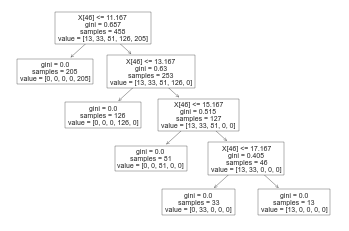

In [442]:
#train and model on all the dataframes

#1. df
print("RESULTS FOR DF -- THE ENTIRE DATASET \n")
df_acc = train_test_models(X_train, Y_train, X_test, Y_test)

tree.plot_tree(modelA) # plotting the decision tree
# A node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class.

RESULTS FOR DF2 -- TOP2 CORRELATED 

Accuracy of DecisionTreeClassifier() is 1.0
Micro Average Precision Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average Precision Score of the classifier DecisionTreeClassifier() is 1.0
Micro Average Recall Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average Recall Score of the classifier DecisionTreeClassifier() is 1.0
Micro Average F1 Score of the classifier DecisionTreeClassifier() is 1.0
Macro Average F1 Score of the classifier DecisionTreeClassifier() is 1.0
Confusion Matrix of DecisionTreeClassifier() is 
 [[ 5  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0 22  0  0]
 [ 0  0  0 45  0]
 [ 0  0  0  0 69]]
True positive =  5
False positive =  0
False negative =  0
True negative =  12
Sensitivity Score of the classifier is:  1.0
Specificity Score of the classifier is:  1.0


Accuracy of RandomForestClassifier() is 0.9738562091503268
Micro Average Precision Score of the classifier RandomForestClassifier() is 0.9738562091

[Text(0.2857142857142857, 0.9, 'X[46] <= 11.167\ngini = 0.694\nsamples = 458\nvalue = [14, 38, 80, 124, 202]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 202\nvalue = [0, 0, 0, 0, 202]'),
 Text(0.42857142857142855, 0.7, 'X[46] <= 13.167\ngini = 0.643\nsamples = 256\nvalue = [14, 38, 80, 124, 0]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 124\nvalue = [0, 0, 0, 124, 0]'),
 Text(0.5714285714285714, 0.5, 'X[46] <= 15.167\ngini = 0.539\nsamples = 132\nvalue = [14, 38, 80, 0, 0]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 80\nvalue = [0, 0, 80, 0, 0]'),
 Text(0.7142857142857143, 0.3, 'X[46] <= 17.167\ngini = 0.393\nsamples = 52\nvalue = [14, 38, 0, 0, 0]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0, 0, 0]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [14, 0, 0, 0, 0]')]

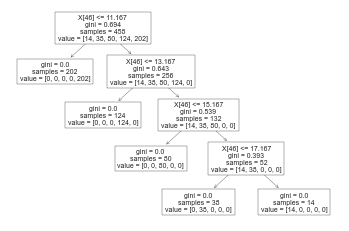

In [443]:
#2. df2
print("RESULTS FOR DF2 -- TOP2 CORRELATED \n")
df2_acc = train_test_models(df2_X_train, df2_Y_train, df2_X_test, df2_Y_test)
tree.plot_tree(modelA) # plotting the decision tree

#3. df5
print("RESULTS FOR DF5 -- TOP 5 CORRELATED \n")
df5_acc = train_test_models(df5_X_train, df5_Y_train, df5_X_test, df5_Y_test)
tree.plot_tree(modelA) # plotting the decision tree 

#4. df10
print("RESULTS FOR DF10 -- TOP 10 CORRELATED \n")
df10_acc = train_test_models(df10_X_train, df10_Y_train, df10_X_test, df10_Y_test)
tree.plot_tree(modelA) # plotting the decision tree

##### Generating Evaluation Metrics (Multi-class ROCAUC Curves)
This metric tells us how well our model can differentiate between the classes. Since ROC is usually used to evaluate binary classification models, we can extend it to multiclass classification by binarizing it (OneVsRest and OneVsAll method), or by averaging.

In [444]:
# The Yellowbrick library was imported to plot ROC AUC Curves for multiclass data
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import yellowbrick.classifier
from yellowbrick.classifier import ROCAUC

#train and test dataframe on the different models


def train_test_models(X_train, Y_train, X_test, Y_test):

    accuracies = []
    for model in models:

        #train model on data
        model.fit(X_train, Y_train)

        visualizer = ROCAUC(model, classes=["A", "B", "C", "D", "E"])
        visualizer.fit(X_train,
                       Y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
        visualizer.show()  # Finalize and render the figure

    return accuracies  # a list of every models accuracy on the current dataset

RESULTS FOR DF -- THE ENTIRE DATASET 



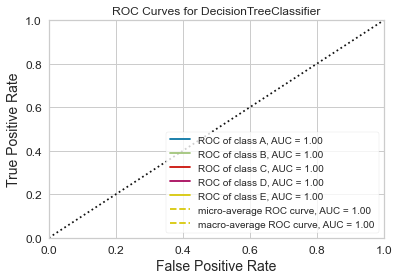

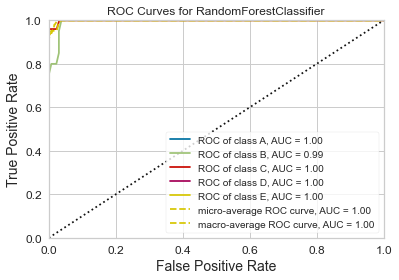

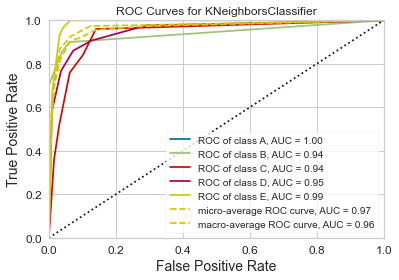

RESULTS FOR DF2 -- TOP2 CORRELATED 



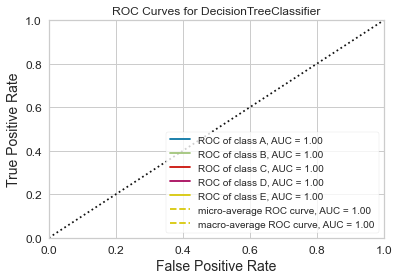

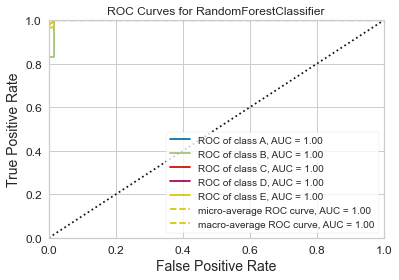

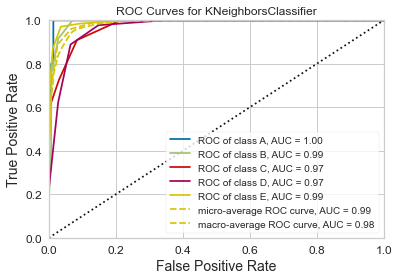

RESULTS FOR DF5 -- TOP 5 CORRELATED 



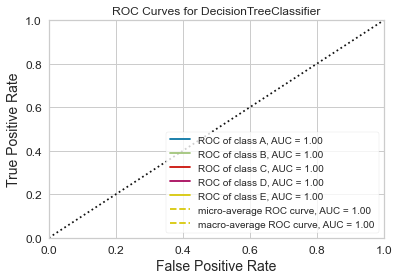

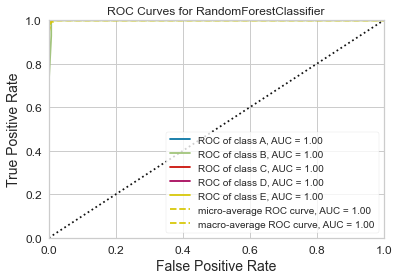

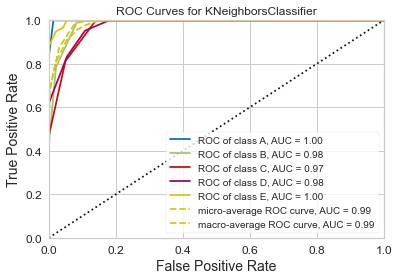

RESULTS FOR DF10 -- TOP 10 CORRELATED 



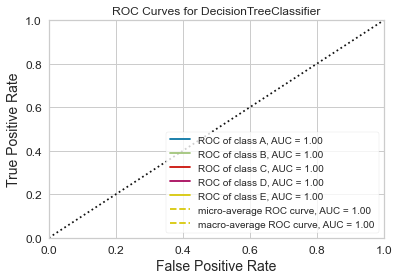

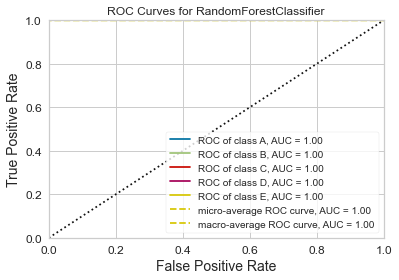

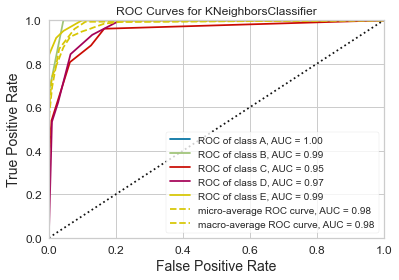

In [445]:
#train and model on all the dataframes

#1. df
print("RESULTS FOR DF -- THE ENTIRE DATASET \n")
df_acc = train_test_models(X_train, Y_train, X_test, Y_test)

#2. df2
print("RESULTS FOR DF2 -- TOP2 CORRELATED \n")
df2_acc = train_test_models(df2_X_train, df2_Y_train, df2_X_test, df2_Y_test)

#3. df5
print("RESULTS FOR DF5 -- TOP 5 CORRELATED \n")
df5_acc = train_test_models(df5_X_train, df5_Y_train, df5_X_test, df5_Y_test)

#4. df10
print("RESULTS FOR DF10 -- TOP 10 CORRELATED \n")
df10_acc = train_test_models(df10_X_train, df10_Y_train, df10_X_test, df10_Y_test)

##### Plotting an Overview/Comparison of Model Performance

In [446]:
# model1_accs = [df_acc[0], df2_acc[0], df5_acc[0], df10_acc[0]]
# model2_accs = [df_acc[1], df2_acc[1], df5_acc[1], df10_acc[1]]
# model3_accs = [df_acc[2], df2_acc[2], df5_acc[2], df10_acc[2]]

# plotdata = pd.DataFrame({
#     "Decision_Tree":model1_accs,
#     "Random_Forest":model2_accs,
#     "KNN":model3_accs
#     }, 
#     index=["df", "df2", "df5", "df10"]
# )
# plotdata.plot(kind="bar")
# plt.title("Test Accuracy of the Models on Different Datasets")
# plt.xlabel("Dataset")
# plt.ylabel("Test Accuracy")

In [447]:
columns = data4.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
data4[columns] = ordinal_encoder.fit_transform(data4[columns])
print(data4)

     school  sex  age  address  fam_size  parent_status  mom_edu  dad_edu  \
1       0.0  0.0   17      1.0       0.0            1.0        1        1   
2       0.0  0.0   15      1.0       1.0            1.0        1        1   
3       0.0  0.0   15      1.0       0.0            1.0        4        2   
4       0.0  0.0   16      1.0       0.0            1.0        3        3   
5       0.0  1.0   16      1.0       1.0            1.0        4        3   
..      ...  ...  ...      ...       ...            ...      ...      ...   
644     1.0  0.0   19      0.0       0.0            1.0        2        3   
645     1.0  0.0   18      1.0       1.0            1.0        3        1   
646     1.0  0.0   18      1.0       0.0            1.0        1        1   
647     1.0  1.0   17      1.0       1.0            1.0        3        1   
648     1.0  1.0   18      0.0       1.0            1.0        3        2   

     mom_job  dad_job  ...  outings  workday_alcohol  weekend_alcohol  heal

In [448]:
# Chi-sqared feature selection was used to check for the top correlated features
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

new_X = data4.drop(columns=['final_grade'])
new_Y = data4[['final_grade']]
# create a test - train split
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.25)


# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
print(X_train)
print(X_train.columns)

Feature 0: 27.685878
Feature 1: 5.053728
Feature 2: 1.382409
Feature 3: 6.218147
Feature 4: 0.831352
Feature 5: 0.493226
Feature 6: 15.467351
Feature 7: 7.376969
Feature 8: 13.886191
Feature 9: 3.098950
Feature 10: 10.311667
Feature 11: 1.491091
Feature 12: 7.274714
Feature 13: 10.387965
Feature 14: 76.897535
Feature 15: 10.935764
Feature 16: 0.436444
Feature 17: 8.747708
Feature 18: 4.328753
Feature 19: 1.423513
Feature 20: 3.836413
Feature 21: 2.022484
Feature 22: 2.759413
Feature 23: 1.527026
Feature 24: 1.385826
Feature 25: 1.186098
Feature 26: 14.402478
Feature 27: 15.600781
Feature 28: 5.630593
Feature 29: 69.062146
Feature 30: 230.074422
Feature 31: 237.750876
Feature 32: 233.131571
Feature 33: 233.361387
     school  sex  age  address  fam_size  parent_status  mom_edu  dad_edu  \
81      0.0  1.0   15      1.0       0.0            1.0        2        3   
27      0.0  1.0   15      1.0       0.0            1.0        4        2   
621     1.0  0.0   17      0.0       0.0       

Results for new df using Chi Classifier -- top3 correlated
     0  1  2
0    3  2  E
1    3  2  D
2    5  3  C
3    5  2  D
4    5  2  D
..  .. .. ..
606  5  3  E
607  1  2  B
608  5  2  E
609  2  1  E
610  5  1  E

[611 rows x 3 columns]


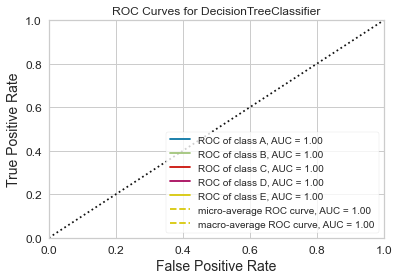

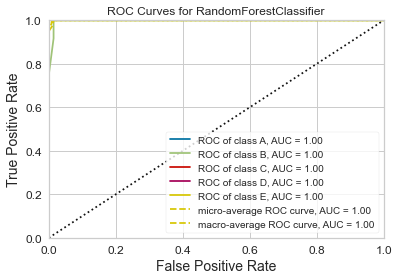

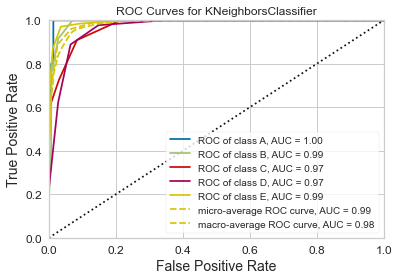

In [449]:
# CHI CLASSIFIER TOP FEATURES
print("Results for new df using Chi Classifier -- top3 correlated")
df2 = data4[['health','studytime','final_grade']]

binary_ordinal_columns = []

nominal_columns = []

numerical_columns = []

new_df = transformer(df2,numerical_columns, nominal_columns, binary_ordinal_columns)
print(new_df)

le = LabelEncoder()
new_df[0] = le.fit_transform(new_df[0])  

#seperate features from target column
X_df10 = new_df.drop(columns=[0])
Y_df10 = new_df[0]
X_df10, Y_df10

df2_acc = train_test_models(df2_X_train, df2_Y_train, df2_X_test, df2_Y_test)

We can observe above a comparison of all the ROC curves for the different classifiers on the entire dataset. 
#The steepness of the curve explains the maximization of the true positive rate while also minimizing the false positive rate.

## Evaluation using cross-validation
we use cross-validation, which applies the same concept as train/test split but on smaller subsets of the data.
A Validation Curve is an important diagnostic tool that shows the sensitivity between to changes in a Machine Learning model’s accuracy with change in some parameter of the model. Two curves are present in a validation curve – one for the training set score and one for the cross-validation score

In [450]:
from yellowbrick.model_selection import ValidationCurve,LearningCurve, CVScores, FeatureImportances, RFECV  
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_predict

# creating a function to run all the models at once and calculate accuracy, precision, recall and F1 score
def cross_validation_eval(new_X,new_Y):
    for model in models:
        print("%s\n"%model)
        scores = cross_val_score(model, new_X, new_Y, cv=10) # using the stratified ten-fold cross-validation method
        acc = scores.mean()
        print("Accuracy of %s is %s"%(model,acc))
        precision = cross_val_score(model, new_X, new_Y, scoring='precision_macro', cv=10)
        print("Precision of %s is %s"%(model,precision.mean()))
        recall = cross_val_score(model, new_X, new_Y, scoring='recall_macro', cv=10)
        print("Recall of %s is %s"%(model,recall.mean()))
        f1 = cross_val_score(model, new_X, new_Y, scoring='f1_macro', cv=10)
        print("F1 score of %s is %s\n"%(model,f1.mean()))
        
        visualizer = CVScores(model, cv=10, scoring='f1_weighted', color='g')
        visualizer.fit(new_X, new_Y)        # Fit the data to the visualizer
        visualizer.show()           # Finalize and render the figure
        
        y_pred = cross_val_predict(model, new_X, new_Y, cv=10)
        cm = confusion_matrix(new_Y, y_pred)
        print("Confusion Matrix of %s is \n %s" % (model, cm))
        print('True positive = ', cm[0][0])
        print('False positive = ', cm[0][1])
        print('False negative = ', cm[1][0])
        print('True negative = ', cm[1][1])
        
        #Each of these subsets serves as a test set, while the remaining k-1 subsets serve as training sets

In [451]:
#1. Prepare df for training - All features

df = data4 
#reference: https://www.kaggle.com/code/scratchpad/notebooke88af56e04/edit


#represent variables that are ordinal or binary - better suited to OrdinalEncoder()
binary_ordinal_columns = ['school', 'sex', 'address', 'fam_size', 'parent_status', 'school_support', 'fam_support', 'paid_class', 'activities', 'nursery', 'higher_edu', 'internet', 'romantic_relations'] 

#represent variables that are nominal and not oridnal- better suited to OneHotEncoder()
nominal_columns = ['mom_job', 'dad_job', 'reason', 'guardian']

#represent numerical varibles (with mean and variance) - Normalize using StandardScalar()
numerical_columns = ['age','absences']

# Use transformer pipline to apply normalization and encode the categorical variables
new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)
# print(new_df)



#encode target class
le = LabelEncoder()
new_df[47] = le.fit_transform(new_df[47]) #final grade column 


#seperate features from target column
new_X = new_df.drop(columns=[47]) # data set with all the attributes except the target attribute
new_Y = new_df[47] # target attribute 

# Cross-validation optimizes the dataset so that there is enough training data rather than creating a new validation set and decreasing the size of the training set. 

DecisionTreeClassifier()

Accuracy of DecisionTreeClassifier() is 1.0
Precision of DecisionTreeClassifier() is 1.0
Recall of DecisionTreeClassifier() is 1.0
F1 score of DecisionTreeClassifier() is 1.0



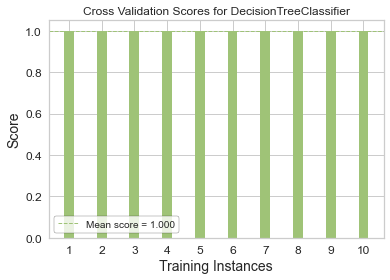

Confusion Matrix of DecisionTreeClassifier() is 
 [[ 19   0   0   0   0]
 [  0  53   0   0   0]
 [  0   0 106   0   0]
 [  0   0   0 169   0]
 [  0   0   0   0 264]]
True positive =  19
False positive =  0
False negative =  0
True negative =  53
RandomForestClassifier()

Accuracy of RandomForestClassifier() is 0.9852987837123216


C:\Users\arizw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arizw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision of RandomForestClassifier() is 0.9346580086580086
Recall of RandomForestClassifier() is 0.9293333333333333
F1 score of RandomForestClassifier() is 0.9542683982683984



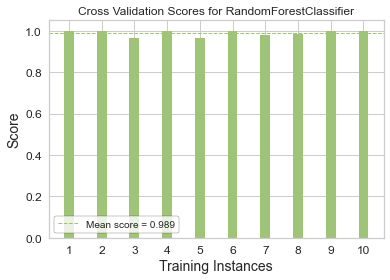

Confusion Matrix of RandomForestClassifier() is 
 [[ 15   4   0   0   0]
 [  0  51   2   0   0]
 [  0   0 106   0   0]
 [  0   0   0 168   1]
 [  0   0   0   0 264]]
True positive =  15
False positive =  4
False negative =  0
True negative =  51
KNeighborsClassifier()

Accuracy of KNeighborsClassifier() is 0.9099947117927023
Precision of KNeighborsClassifier() is 0.9258824072289643
Recall of KNeighborsClassifier() is 0.8928922178039826
F1 score of KNeighborsClassifier() is 0.9024298059185932



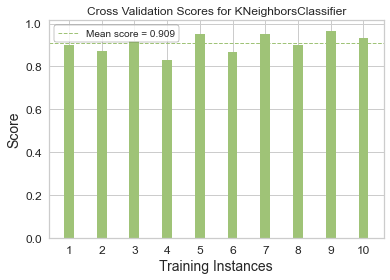

Confusion Matrix of KNeighborsClassifier() is 
 [[ 18   1   0   0   0]
 [  1  42  10   0   0]
 [  0   0  94  12   0]
 [  0   0   6 147  16]
 [  0   0   0   9 255]]
True positive =  18
False positive =  1
False negative =  1
True negative =  42


In [452]:
cross_validation_eval(new_X,new_Y)

The decision tree classifier has the same value for all metrics using train/test split and cross-validation.
The accuracy of the Random Forest Classifier decreases slightly when using cross-validation.
The value of all the evaluation metrics for K Neighbors Classifier increases slightly using cross-validation

# Lab 5: Bayesian Learning and Bayes Nets
In this lab, we looked into the various Bayes Net algorithms, namely Multinomial Naive Bayes, Gaussian Naive Bayes, Complement Naive Bayes, Bernoulli Naive Bayes and Categorical Naive Bayes.

### Naive Bayes

In [453]:
#Create an array of classifiers
models1 = []

modelA = MultinomialNB(alpha = 1.0)
models1.append(modelA)
modelB = ComplementNB(alpha = 1.0)
models1.append(modelB)
modelC = CategoricalNB(alpha = 1.0)
models1.append(modelC)
# modelD = GaussianNB()
# models1.append(modelD)

In [454]:
#train and test dataframe on the different models

def train_test_models1(X_train, Y_train, X_test, Y_test):

    accuracies = []
    for model in models1:

        #train model on data
        model.fit(X_train, Y_train)

        #find accuracy score
        y_pred = model.predict(X_test)
        acc = accuracy_score(Y_test, y_pred)
        print("Accuracy of %s is %s" % (model, acc))

        accuracies.append(acc)

        precision = precision_score(Y_test, y_pred, average='micro')
        print(f"Micro Average Precision Score of the classifier %s is %s" %
              (model, precision))

        precision = precision_score(Y_test, y_pred, average='macro')
        print(f"Macro Average Precision Score of the classifier %s is %s" %
              (model, precision))

        recall = recall_score(Y_test, y_pred, average='micro')
        print(f"Micro Average Recall Score of the classifier %s is %s" %
              (model, recall))

        recall = recall_score(Y_test, y_pred, average='macro')
        print(f"Macro Average Recall Score of the classifier %s is %s" %
              (model, recall))

        fscore = f1_score(Y_test, y_pred, average='micro')
        print(f"Micro Average F1 Score of the classifier %s is %s" %
              (model, fscore))

        fscore = f1_score(Y_test, y_pred, average='macro')
        print(f"Macro Average F1 Score of the classifier %s is %s" %
              (model, fscore))

        #find confusion matrix
        cm = confusion_matrix(Y_test, y_pred)
        print("Confusion Matrix of %s is \n %s" % (model, cm))
        print('True positive = ', cm[0][0])
        print('False positive = ', cm[0][1])
        print('False negative = ', cm[1][0])
        print('True negative = ', cm[1][1])

        sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        print('Sensitivity Score of the classifier is: ', sensitivity)

        specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
        print('Specificity Score of the classifier is: ', specificity)
        
        visualizer = ROCAUC(model, classes=["A", "B", "C", "D", "E"])
        visualizer.fit(X_train,
                       Y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
        visualizer.show()  # Finalize and render the figure

        print('\n')
        print('\n')


    return accuracies  # a list of every models accuracy on the current dataset

Accuracy of MultinomialNB() is 0.5686274509803921
Micro Average Precision Score of the classifier MultinomialNB() is 0.5686274509803921
Macro Average Precision Score of the classifier MultinomialNB() is 0.2892924528301887
Micro Average Recall Score of the classifier MultinomialNB() is 0.5686274509803921
Macro Average Recall Score of the classifier MultinomialNB() is 0.30681358281358284
Micro Average F1 Score of the classifier MultinomialNB() is 0.5686274509803921
Macro Average F1 Score of the classifier MultinomialNB() is 0.2908739908739909
Confusion Matrix of MultinomialNB() is 
 [[ 0  2  2  1  0]
 [ 0  0  3  5  2]
 [ 0  3  3 14  5]
 [ 0  1  3 23 12]
 [ 0  2  1 10 61]]
True positive =  0
False positive =  2
False negative =  0
True negative =  0
Sensitivity Score of the classifier is:  0.0
Specificity Score of the classifier is:  nan


C:\Users\arizw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arizw\AppData\Local\Temp\ipykernel_3256\1320737536.py:53: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])


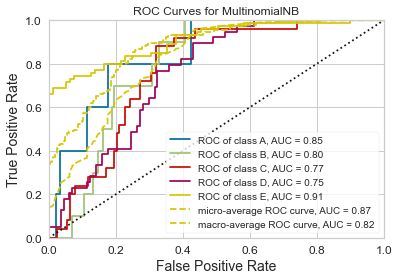





Accuracy of ComplementNB() is 0.5163398692810458
Micro Average Precision Score of the classifier ComplementNB() is 0.5163398692810458
Macro Average Precision Score of the classifier ComplementNB() is 0.2846411149000663
Micro Average Recall Score of the classifier ComplementNB() is 0.5163398692810458
Macro Average Recall Score of the classifier ComplementNB() is 0.2888288288288289
Micro Average F1 Score of the classifier ComplementNB() is 0.5163398692810458
Macro Average F1 Score of the classifier ComplementNB() is 0.2845596277786192
Confusion Matrix of ComplementNB() is 
 [[ 0  3  1  1  0]
 [ 0  1  4  3  2]
 [ 0  6  5  7  7]
 [ 0  5  9 13 12]
 [ 0  2  4  8 60]]
True positive =  0
False positive =  3
False negative =  0
True negative =  1
Sensitivity Score of the classifier is:  0.0
Specificity Score of the classifier is:  1.0


C:\Users\arizw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


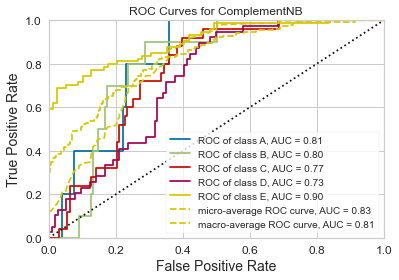





Accuracy of CategoricalNB() is 0.477124183006536
Micro Average Precision Score of the classifier CategoricalNB() is 0.477124183006536
Macro Average Precision Score of the classifier CategoricalNB() is 0.2867216117216117
Micro Average Recall Score of the classifier CategoricalNB() is 0.477124183006536
Macro Average Recall Score of the classifier CategoricalNB() is 0.2827609147609148
Micro Average F1 Score of the classifier CategoricalNB() is 0.477124183006536
Macro Average F1 Score of the classifier CategoricalNB() is 0.2808423497768812
Confusion Matrix of CategoricalNB() is 
 [[ 0  1  1  2  1]
 [ 0  1  3  4  2]
 [ 0  4  6  7  8]
 [ 0  4  4 15 16]
 [ 0  4  2 17 51]]
True positive =  0
False positive =  1
False negative =  0
True negative =  1
Sensitivity Score of the classifier is:  0.0
Specificity Score of the classifier is:  1.0


C:\Users\arizw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


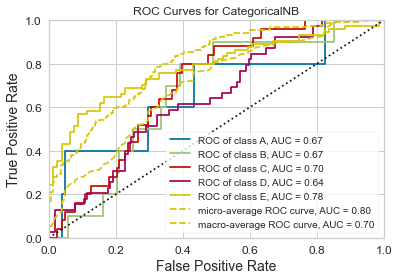

In [455]:
from sklearn.preprocessing import MinMaxScaler

df = data4

#represent variables that are ordinal or binary - better suited to OrdinalEncoder()
binary_ordinal_columns = ['school', 'sex', 'address', 'fam_size', 'parent_status', 'school_support', 'fam_support', 'paid_class', 'activities', 'nursery', 'higher_edu', 'internet', 'romantic_relations'] 

#represent variables that are nominal and not oridnal- better suited to OneHotEncoder()
nominal_columns = ['mom_job', 'dad_job', 'reason', 'guardian']

#represent numerical varibles (with mean and variance) - Normalize using StandardScalar()
numerical_columns = ['age','absences']

new_df = transformer(df,numerical_columns, nominal_columns, binary_ordinal_columns)

le = LabelEncoder()
new_df[47] = le.fit_transform(new_df[47])  

 

#seperate features from target column
X_d = new_df.drop(columns=[47])
Y_d = new_df[47]

 

X_train, X_test, Y_train, Y_test = train_test_split(X_d, Y_d, test_size=0.25)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df_acc = train_test_models1(X_train, Y_train, X_test, Y_test)

Accuracy of MultinomialNB() is 0.5807860262008734
Micro Average Precision Score of the classifier MultinomialNB() is 0.5807860262008734
Macro Average Precision Score of the classifier MultinomialNB() is 0.4358083335763073
Micro Average Recall Score of the classifier MultinomialNB() is 0.5807860262008734
Macro Average Recall Score of the classifier MultinomialNB() is 0.3913915013466217
Micro Average F1 Score of the classifier MultinomialNB() is 0.5807860262008734
Macro Average F1 Score of the classifier MultinomialNB() is 0.3943472139446954
Confusion Matrix of MultinomialNB() is 
 [[  0   3   3   6   2]
 [  0  12   9  17   5]
 [  0   3  19  37  22]
 [  0   2   8  85  35]
 [  0   1   5  34 150]]
True positive =  0
False positive =  3
False negative =  0
True negative =  12
Sensitivity Score of the classifier is:  0.0
Specificity Score of the classifier is:  1.0


C:\Users\arizw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


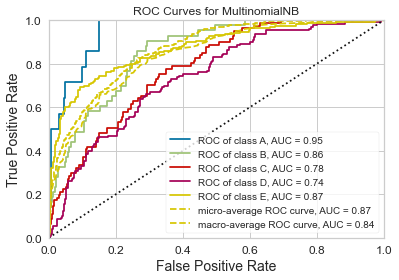





Accuracy of ComplementNB() is 0.5436681222707423
Micro Average Precision Score of the classifier ComplementNB() is 0.5436681222707423
Macro Average Precision Score of the classifier ComplementNB() is 0.3760919443185949
Micro Average Recall Score of the classifier ComplementNB() is 0.5436681222707423
Macro Average Recall Score of the classifier ComplementNB() is 0.3917305454718755
Micro Average F1 Score of the classifier ComplementNB() is 0.5436681222707423
Macro Average F1 Score of the classifier ComplementNB() is 0.3818287796827433
Confusion Matrix of ComplementNB() is 
 [[  0   5   6   1   2]
 [  0  16  14   7   6]
 [  0  10  32  19  20]
 [  0  14  20  55  41]
 [  0   8  10  26 146]]
True positive =  0
False positive =  5
False negative =  0
True negative =  16
Sensitivity Score of the classifier is:  0.0
Specificity Score of the classifier is:  1.0


C:\Users\arizw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


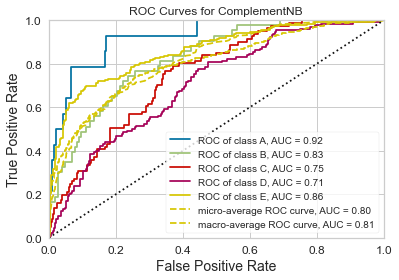





Accuracy of CategoricalNB() is 0.5218340611353712
Micro Average Precision Score of the classifier CategoricalNB() is 0.5218340611353712
Macro Average Precision Score of the classifier CategoricalNB() is 0.4362127349493131
Micro Average Recall Score of the classifier CategoricalNB() is 0.5218340611353712
Macro Average Recall Score of the classifier CategoricalNB() is 0.3834753583753992
Micro Average F1 Score of the classifier CategoricalNB() is 0.5218340611353712
Macro Average F1 Score of the classifier CategoricalNB() is 0.38990519760388764
Confusion Matrix of CategoricalNB() is 
 [[  1   3   3   3   4]
 [  0  15   4  14  10]
 [  0   6  22  28  25]
 [  1  11  14  69  35]
 [  1   7  13  37 132]]
True positive =  1
False positive =  3
False negative =  0
True negative =  15
Sensitivity Score of the classifier is:  0.25
Specificity Score of the classifier is:  1.0


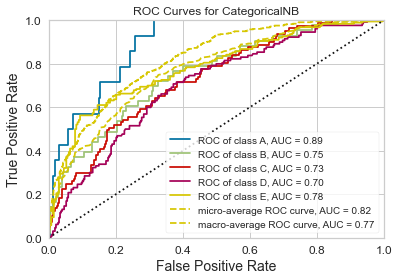

In [456]:
train_acc = train_test_models1(X_train, Y_train, X_train, Y_train)

#### Results 
We implemented the multinomial, categorical and complement Naive Bayes algorithms. It was found that the results of our observations record low evaluation metrics and accuracy values. This is because our model is overfitting and underfitting. A way to solve underfitting is by adding more features to the train test model, but all the features in the dataset are being used. Similarly, overfitting can be solved by adding more samples to the model, but all the samples are being used to give the current results. Thus, no improvement can be observed in the metrics. Note that we did not implement Bernoulli Naïve Bayes algorithm since it is primarily used for data with Bernoulli distributions, i.e., features with more than two outcomes. This will not work on data that is not binary-valued, so we would have to binarize our data to make it work. 

# Lab 7: Clustering
In this lab we implemented k-means clustering as well as other hard and soft clustering algorithms specifically Gaussian Mixture Model and Hierarchical clustering. We also implemented the elbow method as well as the Silhouette Method to find the optimal number of clusters.

### K means

In [457]:
# Getting the target labels in the train and test sets as a numpy array
y = np.array(Y_train)
y_t = np.array(Y_test)

In [458]:
# scaling the X sets (features) with Min-max scaling
scaler = MinMaxScaler()
X_s = scaler.fit_transform(X_train)
X_t = scaler.fit_transform(X_test)
# running thr k means algorithm
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=30, random_state=None) # lloyd is the same as auto
kmeans.fit(X_s) # running it on the training set features

KMeans(max_iter=500, n_clusters=5, n_init=30)

In [459]:
y_pred = kmeans.fit_predict(X_t) # running on the test set
y # labels from train set

array([1, 4, 4, 0, 3, 3, 3, 4, 4, 4, 4, 3, 3, 4, 4, 0, 4, 4, 1, 1, 3, 4,
       3, 4, 4, 4, 4, 3, 3, 4, 4, 2, 2, 1, 3, 2, 4, 4, 4, 4, 3, 1, 1, 3,
       4, 2, 3, 4, 1, 2, 1, 2, 4, 4, 4, 3, 4, 3, 0, 0, 4, 2, 2, 0, 2, 4,
       3, 3, 4, 4, 3, 2, 0, 4, 4, 4, 3, 4, 1, 3, 1, 3, 4, 4, 3, 4, 3, 4,
       1, 4, 1, 4, 4, 3, 4, 4, 2, 2, 1, 4, 4, 3, 3, 4, 4, 2, 3, 3, 4, 4,
       2, 4, 1, 1, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 0, 2, 2, 2, 4, 3,
       3, 3, 2, 3, 3, 3, 3, 1, 3, 1, 4, 4, 4, 4, 4, 3, 3, 2, 2, 3, 4, 2,
       3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 2, 4, 3, 4, 4, 4, 4, 4, 3, 4, 0, 3,
       3, 2, 4, 4, 1, 4, 2, 4, 2, 3, 3, 4, 2, 3, 2, 2, 2, 3, 2, 4, 4, 4,
       4, 3, 4, 4, 2, 4, 3, 4, 2, 3, 3, 2, 0, 2, 4, 4, 3, 4, 2, 3, 1, 3,
       0, 4, 4, 4, 4, 4, 3, 3, 2, 3, 4, 1, 4, 3, 4, 2, 4, 2, 4, 3, 3, 3,
       3, 3, 2, 4, 4, 4, 4, 3, 2, 2, 4, 3, 4, 2, 3, 3, 3, 3, 4, 2, 3, 3,
       2, 3, 1, 4, 3, 4, 3, 3, 3, 4, 2, 4, 4, 3, 1, 1, 2, 3, 3, 3, 4, 4,
       2, 1, 4, 2, 3, 4, 3, 3, 2, 4, 4, 1, 2, 3, 1,

In [460]:
l = kmeans.labels_
l # cluster labels when trained on the training set

array([3, 2, 4, 2, 0, 2, 4, 4, 3, 3, 2, 0, 2, 1, 0, 2, 3, 3, 4, 3, 0, 3,
       4, 1, 2, 3, 4, 3, 4, 1, 2, 4, 3, 4, 4, 0, 0, 0, 3, 2, 2, 4, 1, 4,
       1, 1, 4, 4, 2, 2, 4, 3, 2, 2, 0, 4, 1, 3, 2, 2, 4, 1, 0, 4, 1, 1,
       4, 4, 1, 4, 2, 1, 3, 4, 4, 2, 2, 4, 2, 0, 2, 2, 4, 0, 4, 0, 2, 0,
       2, 3, 2, 2, 2, 2, 4, 3, 4, 4, 4, 3, 1, 2, 4, 1, 3, 2, 2, 1, 0, 2,
       1, 1, 0, 3, 0, 0, 1, 4, 0, 4, 2, 0, 4, 3, 4, 1, 1, 4, 1, 0, 4, 4,
       4, 0, 3, 2, 0, 4, 0, 3, 3, 2, 0, 1, 1, 4, 4, 4, 2, 2, 4, 0, 1])

In [461]:
y_t # labels from the test set

array([0, 4, 1, 4, 4, 4, 2, 4, 2, 1, 4, 3, 4, 4, 4, 3, 3, 4, 2, 4, 3, 2,
       3, 3, 4, 3, 0, 4, 1, 2, 4, 3, 4, 3, 3, 4, 4, 4, 2, 4, 4, 3, 3, 4,
       3, 3, 3, 3, 4, 4, 2, 0, 4, 4, 4, 2, 3, 1, 1, 3, 3, 2, 4, 2, 4, 3,
       3, 3, 4, 2, 3, 2, 2, 4, 2, 4, 4, 1, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 2, 1, 0, 4, 4, 4, 4, 3, 3, 2, 4, 4, 2, 4, 4,
       3, 2, 4, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 3, 2, 2, 3, 4, 1, 4, 1, 2,
       1, 4, 3, 4, 4, 3, 4, 4, 0, 4, 2, 4, 4, 3, 3, 3, 3, 4, 3, 4, 4])

In [462]:
acc = sklearn.metrics.accuracy_score(y_t,y_pred) # computing the accuracy by comparing the predicted labels and actual labels from the test set
print(acc)

0.0915032679738562


In [463]:
kmeans.cluster_centers_ # printing the cluster centres of the clusters made

array([[ 3.13333333e-01,  2.94285714e-01,  1.20000000e-01,
         4.00000000e-02,  1.60000000e-01,  6.40000000e-01,
         4.00000000e-02, -2.08166817e-17,  0.00000000e+00,
         1.20000000e-01,  8.80000000e-01,  2.08166817e-17,
         4.40000000e-01,  1.20000000e-01,  2.40000000e-01,
         2.00000000e-01,  8.00000000e-02,  8.80000000e-01,
         4.00000000e-02,  4.40000000e-01,  7.20000000e-01,
         4.40000000e-01,  3.20000000e-01,  1.00000000e+00,
         4.00000000e-02,  7.20000000e-01,  1.60000000e-01,
         6.80000000e-01,  6.40000000e-01,  8.80000000e-01,
         8.80000000e-01,  6.00000000e-01,  5.70000000e-01,
         4.90000000e-01,  3.06666667e-01,  2.80000000e-01,
         1.46666667e-01,  7.30000000e-01,  5.90000000e-01,
         6.80000000e-01,  2.60000000e-01,  6.10000000e-01,
         6.60000000e-01,  2.47272727e-01,  3.00000000e-01,
         3.16923077e-01,  2.55757576e-01],
       [ 2.63888889e-01,  2.47023810e-01,  4.16666667e-02,
         2.77

## Finding the Optimal Number of Clusters for K-Means Clustering

#### Elbow Method

In [464]:
#perform wss analyses for k-means against 1-10 number of clusters
wss = []
acc = []
kmeansmodels = []
for k in range(1,10):
    kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=k, n_init=30, random_state=42)
    kmeansmodels.append(kmeans)
    kmeans = kmeans.fit(X_s)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    acc.append(sklearn.metrics.accuracy_score(y_t,kmeans.fit_predict(X_t)))

# plot wss against number of clusters
centroids = pd.DataFrame({'Clusters' : range(1,10), 'WSS' : wss})
centroids



C:\Users\arizw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\arizw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters          WSS
0         1  2632.455773
1         2  2448.103294
2         3  2332.220241
3         4  2227.438808
4         5  2170.516747
5         6  2116.816360
6         7  2072.220719
7         8  2034.923334
8         9  1997.950286

<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

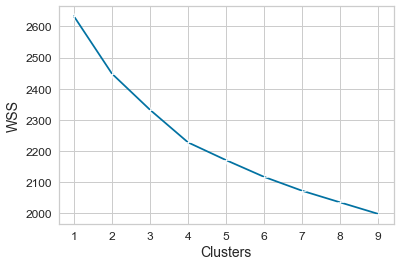

In [465]:
sns.lineplot(x = 'Clusters', y = 'WSS', data = centroids, marker="+")

Optimal number of clusters according to the elbow method = 5

#### Silhouette Methods

In [466]:
SK = range(2,10)
print(kmeansmodels)
sil_score = []
for i in SK:
    labels = kmeansmodels[i-1].fit(X_s).labels_
    score = metrics.silhouette_score(X_s,labels,metric="euclidean")
    sil_score.append(score)


[KMeans(max_iter=500, n_clusters=1, n_init=30, random_state=42), KMeans(max_iter=500, n_clusters=2, n_init=30, random_state=42), KMeans(max_iter=500, n_clusters=3, n_init=30, random_state=42), KMeans(max_iter=500, n_clusters=4, n_init=30, random_state=42), KMeans(max_iter=500, n_clusters=5, n_init=30, random_state=42), KMeans(max_iter=500, n_clusters=6, n_init=30, random_state=42), KMeans(max_iter=500, n_clusters=7, n_init=30, random_state=42), KMeans(max_iter=500, n_init=30, random_state=42), KMeans(max_iter=500, n_clusters=9, n_init=30, random_state=42)]


In [467]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

Clusters  Sil Score
0         2   0.073388
1         3   0.065666
2         4   0.067056
3         5   0.058447
4         6   0.060972
5         7   0.059749
6         8   0.057752
7         9   0.058805

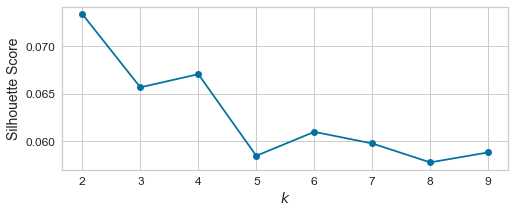

In [468]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), sil_score, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.show()

optimal number of clusters = 2 (max silhouette score)

#### Accuracies for Different k values

In [469]:
# plot wss against number of clusters
myaccs = pd.DataFrame({'Clusters' : range(1,10), 'accuracy' : acc})
print(myaccs)

   Clusters  accuracy
0         1  0.032680
1         2  0.065359
2         3  0.117647
3         4  0.176471
4         5  0.143791
5         6  0.267974
6         7  0.176471
7         8  0.104575
8         9  0.111111


Results: Elbow method works best for our data. 5 clusters shows the best accuracy. 

In [470]:
y = np.array(Y_train)
y_t = np.array(Y_test)
X_s = np.array(X_train[:,0:2])
X_t = np.array(X_test[:,0:2])

In [471]:
#perform wss analyses for k-means against 1-10 number of clusters
wss = []
acc = []
kmeansmodels = []
for k in range(1,10):
    kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=k, n_init=30, random_state=42)
    kmeansmodels.append(kmeans)
    kmeans = kmeans.fit(X_s)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    acc.append(sklearn.metrics.accuracy_score(y_t,kmeans.fit_predict(X_t)))

# plot wss against number of clusters
centroids = pd.DataFrame({'Clusters' : range(1,10), 'WSS' : wss})
centroids


C:\Users\arizw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\arizw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters        WSS
0         1  39.757100
1         2  20.267678
2         3  13.662304
3         4   9.964318
4         5   7.761444
5         6   6.345864
6         7   5.413654
7         8   4.786704
8         9   4.190348

<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

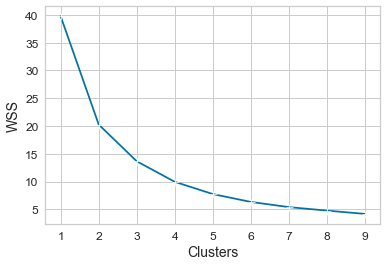

In [472]:
sns.lineplot(x = 'Clusters', y = 'WSS', data = centroids, marker="+")

In [473]:
SK = range(2,10)
sil_score = []
for i in SK:
    labels = kmeansmodels[i-1].fit(X_s).labels_
    print(kmeansmodels[i-1])
    score = metrics.silhouette_score(X_s,labels,metric="euclidean")
    print(score)
    sil_score.append(score)

KMeans(max_iter=500, n_clusters=2, n_init=30, random_state=42)
0.4919872527342809
KMeans(max_iter=500, n_clusters=3, n_init=30, random_state=42)
0.4235358422826179
KMeans(max_iter=500, n_clusters=4, n_init=30, random_state=42)
0.45279949025769456
KMeans(max_iter=500, n_clusters=5, n_init=30, random_state=42)
0.4709698486483651
KMeans(max_iter=500, n_clusters=6, n_init=30, random_state=42)
0.48327642190916076
KMeans(max_iter=500, n_clusters=7, n_init=30, random_state=42)
0.4903395754265188
KMeans(max_iter=500, n_init=30, random_state=42)
0.5326895273139708
KMeans(max_iter=500, n_clusters=9, n_init=30, random_state=42)
0.5318476844946658


In [474]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

Clusters  Sil Score
0         2   0.491987
1         3   0.423536
2         4   0.452799
3         5   0.470970
4         6   0.483276
5         7   0.490340
6         8   0.532690
7         9   0.531848

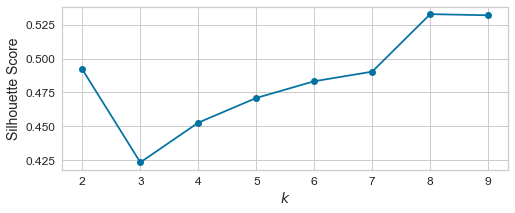

In [475]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), sil_score, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.show()

### Gaussian Mixture Model

In [476]:
y = np.array(Y_train)
y_t = np.array(Y_test)

scaler = MinMaxScaler()
X_s = scaler.fit_transform(X_train)
X_t = scaler.fit_transform(X_test)

In [477]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_s) #setting the number of mixture components to be 5
labels = gmm.fit_predict(X_t)
labels

array([0, 3, 4, 4, 0, 1, 4, 4, 2, 2, 3, 0, 3, 0, 2, 3, 0, 2, 4, 0, 0, 2,
       4, 3, 3, 2, 4, 0, 4, 4, 3, 1, 2, 4, 1, 2, 2, 2, 0, 3, 3, 4, 3, 4,
       0, 0, 1, 4, 1, 3, 4, 0, 3, 2, 2, 4, 4, 2, 3, 3, 4, 4, 2, 4, 4, 4,
       4, 1, 3, 1, 1, 0, 2, 4, 4, 1, 1, 4, 3, 2, 3, 1, 4, 2, 4, 2, 3, 2,
       4, 2, 1, 3, 1, 3, 4, 2, 1, 1, 4, 2, 0, 3, 4, 0, 2, 1, 3, 3, 2, 1,
       0, 4, 2, 2, 2, 2, 3, 1, 0, 4, 1, 2, 1, 2, 4, 4, 4, 4, 0, 2, 4, 1,
       4, 2, 0, 3, 2, 4, 1, 2, 0, 3, 2, 3, 4, 4, 4, 1, 1, 1, 1, 2, 3],
      dtype=int64)

In [478]:
gmm.converged_

True

In [479]:
gmm.n_iter_ #number of iterations for the model to converge

2

In [480]:
p = gmm.predict_proba(X_t) #printing the class probabilities for each data point
p

array([[1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
        0.00000000e+000

In [481]:
acc = sklearn.metrics.accuracy_score(y_t,labels) #calculating the accuracy 
print(acc)

0.17647058823529413


In [482]:
# from sklearn.metrics import pairwise_distances

sil_score = metrics.silhouette_score(X_t,labels, metric="euclidean") #calculating the silhoutte score
sil_score

0.05226710448892101

In [483]:
from sklearn.manifold import TSNE
# using T-SNE for dimensionality reduction to reduce the dataframe to two features to be able to plot a scatter plot 
newm = TSNE(learning_rate = 50)

new_features = newm.fit_transform(X_t) 
new_features[1:4,:]

C:\Users\arizw\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[-4.32851  ,  5.588282 ],
       [-3.3223495, -0.3831886],
       [-7.984637 ,  4.354647 ]], dtype=float32)

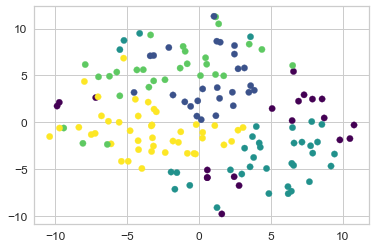

In [484]:
plt.scatter(new_features[:,0], new_features[:,1], c=labels, s=40, cmap='viridis');

## Hierarchical Clustering

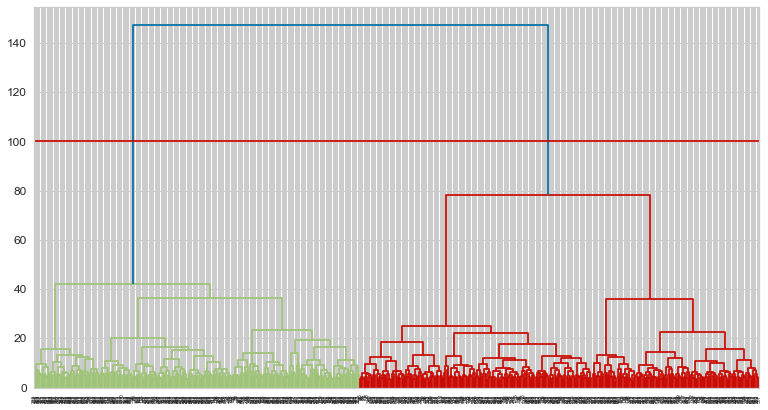

In [485]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage


# data = list(zip(X_d, Y_d))

# linkage_data = linkage(data, method='ward', metric='euclidean')
# dendrogram(linkage_data)

# # The vertical line with maximum distance is the blue line, so the threshold is 70
# plt.axhline(y=70, color='b', linestyle='--')

# plt.show()

plt.figure(figsize=(13, 7))

clusters = shc.linkage(new_df, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)

# The vertical line with maximum distance is the blue line, so the threshold is 100

plt.axhline(y = 100, color = 'r', linestyle = '-')

In [486]:
# After locating the horizontal line, we count how many times our vertical lines were crossed by it - 2 times
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(new_df)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

C:\Users\arizw\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


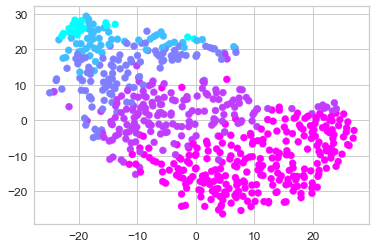

In [487]:
samples = df.iloc[:, :-1].values
variety_numbers = df.iloc[:, -1].values
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:, 0]

# Select the 1st feature: ys
ys = tsne_features[:, 1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=new_df[47], cmap='cool');

### Results on clustering algorithms
It was found that the clustering algorithms did not perform well on our data with a 17% accuracy for k-means algorithm and a 12% accuracy for GMM. When comparing the accuracy values, we observed that the Naive Bayes algorithms performed better on our dataset. 
We used the elbow method and the silhouette method to find the optimal number of clusters to improve the performance of the k-means algorithm over all the features of the dataset. 
- Using the elbow method, we applied k-means clustering to the dataset using 1- 9 clusters values and computed the weighted sum of the square distances (WSS) between each point and the center of its cluster for each value of k. We plotted the graph of the WSS against different cluster values but the results show there was no clear ‘elbow’ in the graph of WSS against different number of clusters that we could use as the optimal number of clusters.   
- Using the silhoutte score method, the k value with the maximum silhouette score was 2, signifying that according to this measure, data points lies best within their cluster when we only use 2 clusters (also the minimum number of clusters). 
- We also found the accuracies for different k-values (k values ranging from 1-9) to validate the performance of the Silhouette method and Elbow method. Considering that our accuracy is best with k = 5, i.e., 5 clusters, neither methods measure the best number of clusters for our data.

Upon further exploration and visualisation using T-SNE, we found that the clustering improved when using only true numeric features I.e., the age and absences feature columns. Hence, we extended the process of finding optimal clusters using the elbow and silhouette methods on a new dataset containing only the age and absences feature columns.  
- We plotted the graph of WSS against different cluster values with this new dataset. This time we could find an ‘elbow’ in the graph when the WSS = 10, this suggests that the optimal number of clusters is 4. Although this is not in line with the number of classes in our dataset, it is inline with the visualisation of the clusters where we observe 4 clear clusters, the 5th cluster does not seem to have a clear boundary.  
- The silhouette method suggests 9 to be the optimal number of clusters for our data set. The silhouette method did not report satisfactory results for our data even while restricting the data set to only 2 numeric features. We concluded that the silhouette method does not work well with our dataset.  


## Lab 8: Decision Trees
For the decision tree algorithm, we have defined values for the following hyperparameters: 
-	criterion: This hyperparameter decides how a decision tree should be split optimally. 
-	splitter: This hyperparameter decides the strategy to be used to choose the split at each node.
-	min_samples_leaf: This hyperparameter determines the minimum number of samples a leaf node must have. 
-	max_depth: This hyperparameter decides the maximum depth a decision tree should go to. 


In [488]:
model = tree.DecisionTreeClassifier(max_depth=5, random_state=42) # spliting criteria is best to choose the best split
# all features are considered when looking for thr best split
# max depth of the tree is set to 5 after referring to previous run of this classifier
model.fit(X_train, y)

DecisionTreeClassifier(max_depth=5, random_state=42)

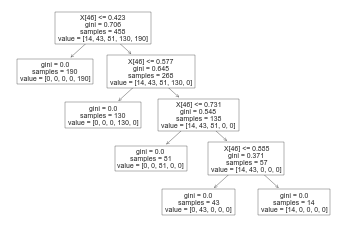

In [489]:
plot_tree(model); # to display the decision tree plotted for the above model

### Search Models

#### Grid Search
GridSearchCV performs hyperparameter tuning automatically which is cumbersome if done manually as there is no way of defining the ideal values of these hyperparameters in advance and deciding the optimal values. GridSearchCV loops through the pre-defined hyperparameter values and finds the most optimal hyperparameters for your model. 
The hyperparameter values are pre-defined by defining a search space as a dictionary specifying the hyper-parameters and the possible values for each. GridSearchCV loops over this dictionary using all possible combinations using the cross-validation algorithm. After this is done, we obtain the accuracy for every hyper-parameter combination and can then choose the one that best fits our estimator.

In [490]:
# To run Grid search for getting optimumm values for the hyperparamters involved in creating a decision tree for our data
# define search space
params =  {
    'criterion':['gini','entropy'],
    'splitter' : ["best", "random"],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
}

# define search model
search = GridSearchCV(model, params, scoring='accuracy', cv=10, verbose = 3)
# run the search
result = search.fit(X_train, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_) # entropy scores are lower

Fitting 10 folds for each of 720 candidates, totalling 7200 fits
[CV 1/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, min_samples_

[CV 4/10] END criterion=gini, max_depth=4, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, min_samples_leaf=5, splitter=random;, score=0.913 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 3

[CV 8/10] END criterion=gini, max_depth=5, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=5, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=5, min_samples_leaf=1, splitter=random;, score=0.911 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=5, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=5, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=5, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=5, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=5, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=5, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV

[CV 8/10] END criterion=gini, max_depth=5, min_samples_leaf=5, splitter=random;, score=0.891 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=5, min_samples_leaf=5, splitter=random;, score=0.933 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=5, min_samples_leaf=5, splitter=random;, score=0.933 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=5, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=5, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=5, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=5, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=5, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=5, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV

[CV 3/10] END criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random;, score=0.911 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=6, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=6, min_samples_leaf=4, splitter=best;, score=1.000 total time= 

[CV 3/10] END criterion=gini, max_depth=6, min_samples_leaf=7, splitter=random;, score=0.870 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=6, min_samples_leaf=7, splitter=random;, score=0.891 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=6, min_samples_leaf=7, splitter=random;, score=0.913 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=6, min_samples_leaf=7, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=6, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=6, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=6, min_samples_leaf=7, splitter=random;, score=0.933 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=6, min_samples_leaf=7, splitter=random;, score=0.889 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=6, min_samples_leaf=8, splitter=best;, score=1.000 total time= 

[CV 3/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=7, min_samples_leaf=4, splitter=random;, score=0.913 total time=   0.0s
[CV 2/1

[CV 6/10] END criterion=gini, max_depth=7, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=7, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=7, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=7, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=7, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=7, min_samples_leaf=8, splitter=random;, score=0.957 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=7, min_samples_leaf=8, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=7, min_samples_leaf=8, splitter=random;, score=0.870 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=7, min_samples_leaf=8, splitter=random;, score=0.978 total time=   0.0s
[

[CV 8/10] END criterion=gini, max_depth=8, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, min_samples_leaf=2, splitter=random;, score=0.913 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, min_samples_leaf=2, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, min_samples_leaf=2, splitter=random;, score=0.891 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.

[CV 1/10] END criterion=gini, max_depth=8, min_samples_leaf=6, splitter=random;, score=0.891 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, min_samples_leaf=6, splitter=random;, score=0.935 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, min_samples_leaf=6, splitter=random;, score=0.913 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, min_samples_leaf=6, splitter=random;, score=0.891 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, min_samples_leaf=6, splitter=random;, score=0.935 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, min_samples_leaf=6, splitter=random;, score=0.891 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, min_samples_leaf=6, splitter=random;, score=0.911 total time=

[CV 1/10] END criterion=gini, max_depth=8, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=8, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=8, min_samples_leaf=10, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, min_samples_leaf=10, splitter=random;, score=0.761 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, min_samples_leaf=10, splitter=random;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, min_samples_leaf=10, splitter=random;, score=0.889 to

[CV 3/10] END criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=9, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 2/1

[CV 5/10] END criterion=gini, max_depth=10, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, min_samples_leaf=1, splitter=random;, score=0.957 total time=  

[CV 8/10] END criterion=gini, max_depth=10, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, min_samples_leaf=5, splitter=random;, score=0.957 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, min_samples_leaf=5, splitter=random;, score=0.935 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, min_samples_leaf=5, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, min_samples_leaf=5, splitter=random;, score=0.870 total t

[CV 4/10] END criterion=gini, max_depth=10, min_samples_leaf=9, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, min_samples_leaf=9, splitter=random;, score=0.739 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=10, min_samples_leaf=9, splitter=random;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=10, min_samples_leaf=9, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, min_samples_leaf=9, splitter=random;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, min_samples_leaf=9, splitter=random;, score=0.889 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=10, min_samples_leaf=9, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, min_samples_leaf=10, splitter=best;, score=1.000 tot

[CV 10/10] END criterion=gini, max_depth=11, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=11, min_samples_leaf=3, splitter=random;, score=0.957 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=11, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=11, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=11, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=11, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=11, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=11, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=11, min_samples_leaf=3, splitter=random;, score=0.978 tot

[CV 5/10] END criterion=gini, max_depth=11, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=11, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=11, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=11, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=11, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=11, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=11, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=11, min_samples_leaf=10, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=11, min_samples_leaf=10, splitter=random;, score=1.000 tota

[CV 3/10] END criterion=gini, max_depth=12, min_samples_leaf=4, splitter=random;, score=0.957 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=12, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, min_samples_leaf=4, splitter=random;, score=0.957 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=12, min_samples_leaf=4, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=12, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=12, min_samples_leaf=4, splitter=random;, score=0.911 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=12, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=12, min_samples_leaf=5, splitter=best;, score=1.000 tot

[CV 8/10] END criterion=gini, max_depth=12, min_samples_leaf=8, splitter=random;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=12, min_samples_leaf=8, splitter=random;, score=0.889 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=12, min_samples_leaf=8, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=12, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=12, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=12, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=12, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, min_samples_leaf=9, splitter=best;, score=1.000 total time=  

[CV 8/10] END criterion=gini, max_depth=15, min_samples_leaf=2, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=15, min_samples_leaf=2, splitter=random;, score=0.956 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=15, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=15, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=15, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=15, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=15, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=15, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=15, min_samples_leaf=3, splitter=best;, score=1.000 total time=  

[CV 5/10] END criterion=gini, max_depth=15, min_samples_leaf=6, splitter=random;, score=0.913 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=15, min_samples_leaf=6, splitter=random;, score=0.891 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=15, min_samples_leaf=6, splitter=random;, score=0.935 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=15, min_samples_leaf=6, splitter=random;, score=0.891 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=15, min_samples_leaf=6, splitter=random;, score=0.911 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=15, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=15, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=15, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=15, min_samples_leaf=7, splitter=best;, score=1.000 total t

[CV 6/10] END criterion=gini, max_depth=20, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=20, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=20, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=20, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=20, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=20, min_samples_leaf=3, splitter=random;, score=0.957 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=20, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=20, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=20, min_samples_leaf=3, splitter=random;, score=0.978 total time=

[CV 1/10] END criterion=gini, max_depth=20, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=20, min_samples_leaf=7, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=20, min_samples_leaf=7, splitter=random;, score=0.870 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=20, min_samples_leaf=7, splitter=random;, score=0.891 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=20, min_samples_leaf=7, splitter=random;, score=0.913 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=20, min_samples_leaf=7, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=20, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=20, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=20, min_samples_leaf=7, splitter=random;, score=0.933 to

[CV 4/10] END criterion=gini, max_depth=30, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=30, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=30, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=30, min_samples_leaf=1, splitter=random;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=30, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=30, min_samples_leaf=1, splitter=random;, score=0.956 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=30, min_samples_leaf=1, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=30, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=30, min_samples_leaf=2, splitter=best;, score=1.000 total

[CV 1/10] END criterion=gini, max_depth=30, min_samples_leaf=5, splitter=random;, score=0.957 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=30, min_samples_leaf=5, splitter=random;, score=0.935 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=30, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=30, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=30, min_samples_leaf=5, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=30, min_samples_leaf=5, splitter=random;, score=0.870 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=30, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=30, min_samples_leaf=5, splitter=random;, score=0.891 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=30, min_samples_leaf=5, splitter=random;, score=0.933 to

[CV 10/10] END criterion=gini, max_depth=40, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=40, min_samples_leaf=2, splitter=random;, score=0.913 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=40, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=40, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=40, min_samples_leaf=2, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=40, min_samples_leaf=2, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=40, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=40, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=40, min_samples_leaf=2, splitter=random;, score=0.957 tot

[CV 3/10] END criterion=gini, max_depth=40, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=40, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=40, min_samples_leaf=6, splitter=random;, score=0.913 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=40, min_samples_leaf=6, splitter=random;, score=0.891 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=40, min_samples_leaf=6, splitter=random;, score=0.935 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=40, min_samples_leaf=6, splitter=random;, score=0.891 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=40, min_samples_leaf=6, splitter=random;, score=0.911 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=40, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=40, min_samples_leaf=7, splitter=best;, score=1.000 tot

[CV 7/10] END criterion=gini, max_depth=40, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=40, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=40, min_samples_leaf=10, splitter=random;, score=0.889 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=40, min_samples_leaf=10, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=50, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=50, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=50, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=50, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=50, min_samples_leaf=1, splitter=best;, score=1.000 total t

[CV 6/10] END criterion=gini, max_depth=50, min_samples_leaf=4, splitter=random;, score=0.957 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=50, min_samples_leaf=4, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=50, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=50, min_samples_leaf=4, splitter=random;, score=0.911 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=50, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=50, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=50, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=50, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=50, min_samples_leaf=5, splitter=best;, score=1.000 total tim

[CV 9/10] END criterion=gini, max_depth=50, min_samples_leaf=8, splitter=random;, score=0.889 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=50, min_samples_leaf=8, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0

[CV 4/10] END criterion=gini, max_depth=70, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=70, min_samples_leaf=5, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=70, min_samples_leaf=5, splitter=random;, score=0.870 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=70, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=70, min_samples_leaf=5, splitter=random;, score=0.891 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=70, min_samples_leaf=5, splitter=random;, score=0.933 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=70, min_samples_leaf=5, splitter=random;, score=0.911 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=70, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=70, min_samples_leaf=6, splitter=best;, score=1.000 total

[CV 4/10] END criterion=gini, max_depth=70, min_samples_leaf=9, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=70, min_samples_leaf=9, splitter=random;, score=0.739 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=70, min_samples_leaf=9, splitter=random;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=70, min_samples_leaf=9, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=70, min_samples_leaf=9, splitter=random;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=70, min_samples_leaf=9, splitter=random;, score=0.889 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=70, min_samples_leaf=9, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=70, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=70, min_samples_leaf=10, splitter=best;, score=1.000 tot

[CV 1/10] END criterion=gini, max_depth=90, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=90, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=90, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=90, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=90, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=90, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=90, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=90, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=90, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[

[CV 4/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=random;, score=0.957 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=90, min_samples_leaf=8, splitter=random;, score=0.978 total time=   0

[CV 10/10] END criterion=gini, max_depth=120, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=120, min_samples_leaf=2, splitter=random;, score=0.913 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=120, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=120, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=120, min_samples_leaf=2, splitter=random;, score=0.957 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=120, min_samples_leaf=2, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=120, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=120, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=120, min_samples_leaf=2, splitter=random;, score=

[CV 6/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=random;, score=0.978 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=120, min_samples_leaf=9, splitter=random;, score=0.978 to

[CV 1/10] END criterion=gini, max_depth=150, min_samples_leaf=3, splitter=random;, score=0.957 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=150, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=150, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=150, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=150, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=150, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=150, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=150, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=150, min_samples_leaf=3, splitter=random;, score

[CV 2/10] END criterion=gini, max_depth=150, min_samples_leaf=7, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=150, min_samples_leaf=7, splitter=random;, score=0.870 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=150, min_samples_leaf=7, splitter=random;, score=0.891 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=150, min_samples_leaf=7, splitter=random;, score=0.913 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=150, min_samples_leaf=7, splitter=random;, score=0.978 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=150, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=150, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=150, min_samples_leaf=7, splitter=random;, score=0.933 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=150, min_samples_leaf=7, splitter=random;, scor

[CV 1/10] END criterion=entropy, max_depth=4, min_samples_leaf=1, splitter=random;, score=0.826 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, min_samples_leaf=1, splitter=random;, score=0.913 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=4, min_samples_leaf=1, splitter=random;, score=0.935 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=4, min_samples_leaf=1, splitter=random;, score=0.891 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, min_samples_leaf=1, splitter=random;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, min_samples_leaf=1, splitter=rando

[CV 5/10] END criterion=entropy, max_depth=4, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=4, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=4, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=4, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=4, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=4, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=4, min_samples_leaf=5, splitter=random;, score=0.826 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=4, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=4, min_samples_leaf=5, splitter=random;, score=0

[CV 1/10] END criterion=entropy, max_depth=5, min_samples_leaf=2, splitter=random;, score=0.848 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=5, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=5, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=5, min_samples_leaf=2, splitter=random;, score=0.891 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=5, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=5, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=5, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=5, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=5, min_samples_leaf=2, splitter=rando

[CV 6/10] END criterion=entropy, max_depth=5, min_samples_leaf=6, splitter=random;, score=0.935 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=5, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=5, min_samples_leaf=6, splitter=random;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=5, min_samples_leaf=6, splitter=random;, score=0.889 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=5, min_samples_leaf=6, splitter=random;, score=0.911 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=5, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=5, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=5, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=5, min_samples_leaf=7, splitter=best;, sco

[CV 3/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=6, min_samples_leaf=1, splitter=random;, score=0.848

[CV 7/10] END criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=random;, score=0.891 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=random;, score=0.913 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=random;, sco

[CV 10/10] END criterion=entropy, max_depth=7, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=7, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=7, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=7, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=7, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=7, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=7, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=7, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=7, min_samples_leaf=2, splitter=best;, score=1.000

[CV 10/10] END criterion=entropy, max_depth=7, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=7, min_samples_leaf=6, splitter=best;, score=1.000

[CV 1/10] END criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best;, score

[CV 2/10] END criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=best;, score=1.000 t

[CV 8/10] END criterion=entropy, max_depth=8, min_samples_leaf=7, splitter=random;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=8, min_samples_leaf=7, splitter=random;, score=0.889 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=8, min_samples_leaf=7, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, min_samples_leaf=8, splitter=best;, score=1

[CV 4/10] END criterion=entropy, max_depth=9, min_samples_leaf=4, splitter=random;, score=0.935 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=9, min_samples_leaf=4, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=9, min_samples_leaf=4, splitter=random;, score=0.957 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=9, min_samples_leaf=4, splitter=random;, score=0.935 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=9, min_samples_leaf=4, splitter=random;, score=0.935 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=9, min_samples_leaf=4, splitter=random;, score=0.911 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=9, min_samples_leaf=4, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=9, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=9, min_samples_leaf=5, splitter=best;,

[CV 5/10] END criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=random;, score=0.913 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=random;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=random;, score=0.935 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=random;, score=0.889 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=9, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=9, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=9, min_samples_leaf=9, splitter=best;, s

[CV 8/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, splitter=random;, score=0.957 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, splitter=random;, score=0.933 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, min_samples_leaf=3, splitter=best;

[CV 5/10] END criterion=entropy, max_depth=10, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, min_samples_leaf=7, splitter=random;, score=0.761 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=10, min_samples_leaf=7, splitter=random;, score=0.957 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=10, min_samples_leaf=7, splitter=random;

[CV 7/10] END criterion=entropy, max_depth=11, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=11, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=11, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=11, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=11, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=11, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=11, min_samples_leaf=1, splitter=random;, score=0.913 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=11, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=11, min_samples_leaf=1, splitter=ran

[CV 3/10] END criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=random;, sc

[CV 3/10] END criterion=entropy, max_depth=12, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=12, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=12, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=12, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=12, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=12, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=12, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=12, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=12, min_samples_leaf=3, splitter=random;, sc

[CV 6/10] END criterion=entropy, max_depth=12, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=12, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=12, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=12, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=12, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=12, min_samples_leaf=10, splitter=random;, score=0.826 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=12, min_samples_leaf=10, splitter=random;, score=0.935 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=12, min_samples_leaf=10, splitter=random;, score=0.848 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=12, min_samples_leaf=10, split

[CV 8/10] END criterion=entropy, max_depth=15, min_samples_leaf=6, splitter=random;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=15, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=15, min_samples_leaf=6, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=15, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=15, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=15, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=15, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=15, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=15, min_samples_leaf=7, splitter=best;

[CV 3/10] END criterion=entropy, max_depth=20, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=20, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=20, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=20, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=20, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=20, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=20, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=20, min_samples_leaf=1, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=20, min_samples_leaf=1, splitter=random;, sc

[CV 7/10] END criterion=entropy, max_depth=20, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=20, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=20, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=20, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=20, min_samples_leaf=5, splitter=random;, score=0.891 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=20, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=20, min_samples_leaf=5, splitter=random;, score=0.957 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=20, min_samples_leaf=5, splitter=random;, score=0.935 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=20, min_samples_leaf=5, splitter=ran

[CV 6/10] END criterion=entropy, max_depth=20, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=20, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=20, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=20, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=20, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=20, min_samples_leaf=9, splitter=random;, score=0.826 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=20, min_samples_leaf=9, splitter=random;, score=0.957 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=20, min_samples_leaf=9, splitter=random;, score=0.848 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=20, min_samples_leaf=9, splitter=rando

[CV 1/10] END criterion=entropy, max_depth=30, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=30, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=30, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=30, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=30, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=30, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=30, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=30, min_samples_leaf=6, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=30, min_samples_leaf=6, splitter=best;, score

[CV 10/10] END criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=random;, score=0.911 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=30, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=30, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=30, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=30, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=30, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=30, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=30, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=30, min_samples_leaf=10, splitter=b

[CV 1/10] END criterion=entropy, max_depth=40, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=40, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=40, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=40, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=40, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=40, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=40, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=40, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=40, min_samples_leaf=4, splitter=best;, score

[CV 8/10] END criterion=entropy, max_depth=40, min_samples_leaf=7, splitter=random;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=40, min_samples_leaf=7, splitter=random;, score=0.889 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=40, min_samples_leaf=7, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=40, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=40, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=40, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=40, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=40, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=40, min_samples_leaf=8, splitter=best;

[CV 8/10] END criterion=entropy, max_depth=50, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=50, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=50, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=50, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=50, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=50, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=50, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=50, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=50, min_samples_leaf=2, splitter=best;

[CV 8/10] END criterion=entropy, max_depth=50, min_samples_leaf=8, splitter=random;, score=0.935 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=50, min_samples_leaf=8, splitter=random;, score=0.889 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=50, min_samples_leaf=8, splitter=random;, score=0.956 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=50, min_samples_leaf=9, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=50, min_samples_leaf=9, splitter=best;

[CV 10/10] END criterion=entropy, max_depth=70, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=70, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=70, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=70, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=70, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=70, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=70, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=70, min_samples_leaf=3, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=70, min_samples_leaf=3, splitter=best;, sc

[CV 4/10] END criterion=entropy, max_depth=70, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=70, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=70, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=70, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=70, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=70, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=70, min_samples_leaf=7, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=70, min_samples_leaf=7, splitter=random;, score=0.761 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=70, min_samples_leaf=7, splitter=random;, 

[CV 1/10] END criterion=entropy, max_depth=90, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=90, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=90, min_samples_leaf=1, splitter=random;, score=0.913 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=90, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=90, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=90, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=90, min_samples_leaf=1, splitter=random;, score=0.957 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=90, min_samples_leaf=1, splitter=random;, score=0.978 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=90, min_samples_leaf=1, split

[CV 1/10] END criterion=entropy, max_depth=90, min_samples_leaf=5, splitter=random;, score=0.891 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=90, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=90, min_samples_leaf=5, splitter=random;, score=0.957 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=90, min_samples_leaf=5, splitter=random;, score=0.935 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=90, min_samples_leaf=5, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=90, min_samples_leaf=5, splitter=random;, score=0.957 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=90, min_samples_leaf=5, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=90, min_samples_leaf=5, splitter=random;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=90, min_samples_leaf=5, split

[CV 10/10] END criterion=entropy, max_depth=120, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=120, min_samples_leaf=2, splitter=random;, score=0.913 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=120, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=120, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=120, min_samples_leaf=2, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=120, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=120, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=120, min_samples_leaf=2, splitter=random;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=120, min_samples_leaf=

[CV 3/10] END criterion=entropy, max_depth=120, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=120, min_samples_leaf=6, splitter=random;, score=0.913 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=120, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=120, min_samples_leaf=6, splitter=random;, score=0.935 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=120, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=120, min_samples_leaf=6, splitter=random;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=120, min_samples_leaf=6, splitter=random;, score=0.978 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=120, min_samples_leaf=6, splitter=random;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=120, min_samples_lea

[CV 10/10] END criterion=entropy, max_depth=120, min_samples_leaf=10, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=120, min_samples_leaf=10, splitter=random;, score=0.826 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=120, min_samples_leaf=10, splitter=random;, score=0.935 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=120, min_samples_leaf=10, splitter=random;, score=0.848 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=120, min_samples_leaf=10, splitter=random;, score=0.913 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=120, min_samples_leaf=10, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=120, min_samples_leaf=10, splitter=random;, score=0.891 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=120, min_samples_leaf=10, splitter=random;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=120, min_sampl

[CV 9/10] END criterion=entropy, max_depth=150, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=150, min_samples_leaf=4, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=150, min_samples_leaf=4, splitter=random;, score=0.891 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=150, min_samples_leaf=4, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=150, min_samples_leaf=4, splitter=random;, score=0.935 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=150, min_samples_leaf=4, splitter=random;, score=0.935 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=150, min_samples_leaf=4, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=150, min_samples_leaf=4, splitter=random;, score=0.957 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=150, min_samples_leaf=4,

[CV 5/10] END criterion=entropy, max_depth=150, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=150, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=150, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=150, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=150, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=150, min_samples_leaf=8, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=150, min_samples_leaf=8, splitter=random;, score=0.826 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=150, min_samples_leaf=8, splitter=random;, score=0.957 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=150, min_samples_leaf=8, splitte

#### Randomized Search
RandomizedSearchCV follows the same approach as GridSearchCV except that in RandomizedSearchCV, we define distributions of the parameters instead of explicitly defining the values. Also, the values that are to be tested in RandomizedSearchCV are selected at random so not all the values are tested which is in contrast to GridSearchCV where all possible values are exhaustively searched. In this algorithm, we can specify the number of iterations which will define the number of random samples that will be tested. In our implementation below, we have specified parameter distributions for the hyperparameters and have taken the default value of the number of iterations which is 10.


In [491]:
# To run Randomized search for getting optimumm values for the hyperparamters involved in creating a decision tree for our data
# ranges of possible values for the parameters; for the search space
param_distributions =  {
    'criterion':['gini','entropy'],
    'splitter' : ["best", "random"],
    'min_samples_leaf': list(range(1,11)),
    'max_depth': list(range(1,150))
}
# define search model
search = RandomizedSearchCV(model, param_distributions, cv=10, verbose=3,scoring='accuracy') # iterations are 10
# run the search
result = search.fit(X_train, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END criterion=entropy, max_depth=130, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=130, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=130, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=130, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=130, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=130, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=130, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=130, min_samples_leaf=2, splitter=best;, score=1.000 total time=   0.0s
[CV 9/10] END cri

[CV 10/10] END criterion=gini, max_depth=52, min_samples_leaf=5, splitter=best;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=35, min_samples_leaf=3, splitter=random;, score=0.913 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=35, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=35, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=35, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=35, min_samples_leaf=3, splitter=random;, score=0.957 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=35, min_samples_leaf=3, splitter=random;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=35, min_samples_leaf=3, splitter=random;, score=0.978 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=35, min_samples_leaf=3, splitter=

It can be oberved that GridSearchCV obtains a best score of 1 and RandomizedSearchCV obtains a best score of 0.936. 
This shows that RandomizedSearchCV, since it is not testing all possible hyperparameter combinations, does not produce the best performing values. However, an advantage of this algorithm is that it performs its computation in a significantly lesser amount of time in comparison to GridSearchCV.  


### Evaluation and Experimentation with Decision trees
The decision trees are further created with the optimal values found from the searches above and are evaluated by train-test split (holdout method) where the split is made with different proportions for the sets. Ten-fold Cross validation has been used too.

In [492]:
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.3) # 70% training and 30% test

# Experimenting with train-test split using the best hyperparameters found from GridSearchCV
model = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 4, min_samples_leaf = 1, splitter = "best")

# Train Decision Tree Classifer
model = model.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy
print("Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Accuracy:  1.0


In [493]:
# Experimenting with train-test split using the best hyperparameters found from RandomizedSearchCV
model = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 22, min_samples_leaf = 1, splitter = "best")

# Train Decision Tree Classifer
model = model.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train) 

# Model Accuracy
print("Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Accuracy:  1.0


In [494]:
# Train - Test Split
# moving 30% of the instances from the original training set into the testing set
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.6) # 40% training and 60% test

sumtrain = 0
sumtest = 0
for i in range(10): # average the train and test accuracies over 10 runs for the given model
    model = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 4, min_samples_leaf = 1, splitter = "best")
    model = model.fit(X_train, Y_train) # for train set 
    y_pred = model.predict(X_test) # predictions for test set
    y_train_pred = model.predict(X_train)
    # computing the accuracies
    sumtrain = sumtrain + metrics.accuracy_score(Y_train, y_train_pred) 
    sumtest = sumtest + metrics.accuracy_score(Y_test, y_pred)

print("Train Accuracy: ", sumtrain/10)
print("Test Accuracy: ", sumtest/10)

Train Accuracy:  1.0
Test Accuracy:  1.0


In [495]:
# moving 60% of the instances from the original training set into the testing set
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.9) # 10% training and 90% test

sumtrain = 0
sumtest = 0
for i in range(10):  # average the train and test accuracies over 10 runs for the given model
    model = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 4, min_samples_leaf = 1, splitter = "best")
    model = model.fit(X_train, Y_train) # for train set 
    y_pred = model.predict(X_test)  # predictions for test set
    y_train_pred = model.predict(X_train)
    # computing the accuracies
    sumtrain = sumtrain + metrics.accuracy_score(Y_train, y_train_pred)
    sumtest = sumtest + metrics.accuracy_score(Y_test, y_pred)

print("Train Accuracy: ", sumtrain/10)
print("Test Accuracy: ", sumtest/10)

Train Accuracy:  1.0
Test Accuracy:  0.9905454545454546


In [496]:
# Cross-validation
scores = cross_val_score(model, new_X, new_Y, cv=10) # using the ten-fold cross-validation method
acc = scores.mean() # average accuracy
print("Accuracy of %s is %s"%(model,acc))

Accuracy of DecisionTreeClassifier(max_depth=4) is 1.0


From the results above and those from Lab 4, we can infer that the decision tree classifier works well on our dataset.

### Random Forests
These have been run as a part of Lab-4 earlier and have been re-run and evaluated using but holdout method with different split percentages and ten-fold cross validation. As reported previously, the accuracies are in a good range.

In [497]:
rfc = RandomForestClassifier() # creating a Random Forest model
rfc = rfc.fit(X_train, Y_train) # traning the model
y_pred = rfc.predict(X_test) # testing the model on the test set
y_train_pred = rfc.predict(X_train) # for train accuracy

print("Train Accuracy: ", metrics.accuracy_score(Y_train, y_train_pred))
print("Test Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Train Accuracy:  1.0
Test Accuracy:  0.88


In [498]:
# moving 30% of the instances from the original training set into the testing set
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.6) # 40% training and 60% test

sumtrain = 0
sumtest = 0
for i in range(10): # average the train and test accuracies over 10 runs for the given model
    rfc = RandomForestClassifier()
    rfc = model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_train_pred = rfc.predict(X_train) 
    sumtrain = sumtrain + metrics.accuracy_score(Y_train, y_train_pred)
    sumtest = sumtest + metrics.accuracy_score(Y_test, y_pred)

print("Train Accuracy: ", sumtrain/10)
print("Test Accuracy: ", sumtest/10)

Train Accuracy:  1.0
Test Accuracy:  1.0


In [499]:
# moving 60% of the instances from the original training set into the testing set
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.9) # 10% training and 90% test

sumtrain = 0
sumtest = 0
for i in range(10): # average the train and test accuracies over 10 runs for the given model
    rfc = RandomForestClassifier()
    rfc = model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_train_pred = rfc.predict(X_train) 
    sumtrain = sumtrain + metrics.accuracy_score(Y_train, y_train_pred)
    sumtest = sumtest + metrics.accuracy_score(Y_test, y_pred)

print("Train Accuracy: ", sumtrain/10)
print("Test Accuracy: ", sumtest/10)

Train Accuracy:  1.0
Test Accuracy:  0.9669090909090909


In [500]:
# Cross-validation
scores = cross_val_score(rfc, new_X, new_Y, cv=10) # using the ten-fold cross-validation method
acc = scores.mean() # averaging the accuracy
print("Accuracy of %s is %s"%(rfc,acc))

Accuracy of DecisionTreeClassifier(max_depth=4) is 1.0


According to the accuracy calculated by running the decision tree and random forest classifier for 10% training and 90% test split, we noted that the data was overfitting. The cross-validation method was also performed to calculate the mean accuracy and compare it against the train-test split. 

## Lab 9: Linear Classification and Logistic Regression

### Simple Linear Classification

Linear regression was used to solve a linear classification problem. We are using the final grade as our target class/dependent variable. G1 exam is selected to be the independent variable. The accuracy of the model was tested over the test data set with an accuracy score of 0.79. A scatter plot was plotted using the overall grade against the variable grades in G1 exams to validate the thresholds. A threshold was applied to the linear regression model to help classify the grades appropriately.


In [501]:
# Prepare Data for Linear Classification
x = data4[['G1']]
# encode target class for classification using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data4.iloc[:,-1]) # final grade column 

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25) # splitting into train and test sets
# scaling the train and test sets of features using Min-max scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [502]:
# Making a linear regression model and training it on the train set
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train) #train linear regression on X and y
lin_reg.intercept_, lin_reg.coef_ # learning parameters 
y_pred_train = lin_reg.predict(X_train)
print(len(y_pred_train))
print(len(X_train))

458
458


Text(0, 0.5, 'overall grades')

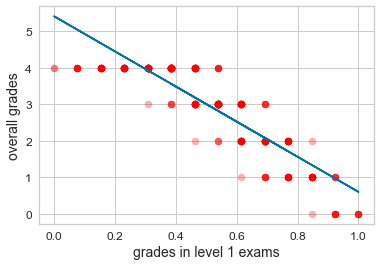

In [503]:
# Plotting a graph with the training features and the labels with their predictions
plt.plot(X_train, y_pred_train)
plt.scatter(X_train, Y_train, color = 'red', alpha = 0.3)
plt.xlabel("grades in level 1 exams")
plt.ylabel("overall grades")

Visually picking thresholds for grades:
- Threshold for A: grades < 0.5
- Threshold for B: 0.5 < grades < 1.5
- Threshold for C: 1.5 < grades < 2.5
- Threshold for D: 2.5 < grades < 3.5
- Threshold for E: grades > 3.5 

### Checking Accuracy over Test Set

In [504]:
# deciding the prediction labels based on the tresholds
def threshold(predictions):
    for i in range (len(predictions)):
        if predictions[i] > 3.5:
            predictions[i] = 4
        elif (predictions[i] > 2.5) & (predictions[i]<3.5):
            predictions[i] = 3
        elif (predictions[i] > 1.5) & (predictions[i] < 2.5):
            predictions[i] = 2
        elif (predictions[i] > 0.5) & (predictions[i] < 1.5):
            predictions[i] = 1
        else: 
            predictions[i] = 0

In [505]:
# predict grades
y_pred_test = lin_reg.predict(X_test)
#apply threshold
threshold(y_pred_test)
# Model Accuracy
print("Accuracy: ", metrics.accuracy_score(Y_test, y_pred_test))

Accuracy:  0.7254901960784313


### Mulitple Linear Regression
The target class, which is the final grade column, was encoded. The train and test sets were split, with a test size of 0.25% samples. Multiple linear regression was used to train the model on x and y using the function lr.fit(X_train , Y_train). The threshold was applied to the predicted grade test set. Finally, the model accuracy was predicted at 0.86.
Multiple linear regression uses all the features of the dataset to give a more thorough picture of the analysis taking place.


In [506]:
x = data4.iloc[:,:-1]
#e ncode target class
le = LabelEncoder()
y = le.fit_transform(data4.iloc[:,-1]) # final grade column 

lr = LinearRegression() # the Linear Regression model
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25) 

lr.fit(X_train, Y_train) #train linear regression on X and y

# predict grades
y_pred_test = lr.predict(X_test)
#apply threshold
threshold(y_pred_test)
# Model Accuracy
print("Accuracy: ", metrics.accuracy_score(Y_test, y_pred_test))


Accuracy:  0.8562091503267973


### Mean Sqaures Error (MSE) over Test Set
Mean squared error (MSE) measures how close a regression line is to a set of points. It is calculated by taking the average and the mean. The first metric used to evaluate the model is the MSE (mean squared error) followed by the RMSE (root means squared error) metric.

In [507]:
mse = mean_squared_error(Y_test, y_pred_test) # to compute the mean square error between the actual and predicted test labels
print(mse)

rmse = np.sqrt(mean_squared_error(Y_test, y_pred_test)) # RMSE - Result is square rooted to make it more interpretable
print(rmse)

0.1437908496732026
0.3791976393296807


In [508]:
mae = mean_absolute_error(Y_test, y_pred_test) # to compute the mean absolute error between the actual and predicted test labels
print(mae)

0.1437908496732026


In [521]:
precision = precision_score(Y_test,y_pred_test, average='macro')
print(f"Macro Average Precision Score of the classifier %s is %s" % (lin_reg, precision))

recall = recall_score(Y_test,y_pred_test, average='macro')
print(f"Macro Average Recall Score of the classifier %s is %s" % (lin_reg, recall))

fscore = f1_score(Y_test,y_pred_test, average='macro')
print(f"Micro Average F1 Score of the classifier %s is %s" % (lin_reg, fscore))

Macro Average Precision Score of the classifier LinearRegression() is 0.3464052287581699
Macro Average Recall Score of the classifier LinearRegression() is 0.17447283898896804
Micro Average F1 Score of the classifier LinearRegression() is 0.19901486671223512


Since our dataset is imbalanced, with a 43% imbalance on one class (‘E’), we use macro-average F1 score to report the performance over our dataset regarding Linear and Logistic Regression classifiers. This makes sure that all the classes are treated equally, and the evaluation metrics indicate an accurate measure of learning. 

### Logistic Regression
The multinomial scheme is used to perform multi-class classification. All the columns are selected from the data4 dataset except for the final_grade. Copy of train and test sets are used to create a new column that shows the predicted label based on G1. The mean accuracy of 10 runs is calculated on the test data and labels which is 0.77. The train and test set accuracies are predicted based on the new train and test sets. The sum train and sum test values are variables used to store the mean accuracy of 10 runs on the train-test dataset. SGD classifier has been used in order to set the learning rate (alpha) which would not be possible with the basic Logictic Regression model. 

In [522]:
#specifying the multi_class parameter as ovr to use the one-vs-rest scheme to perform multi-class classification
lg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42) 

In [523]:
# Getting all the columns except final_grade from data4 
required_columns = ['school', 'sex', 'age', 'address', 'fam_size', 'parent_status',
       'mom_edu', 'dad_edu', 'mom_job', 'dad_job', 'reason', 'guardian',
       'traveltime', 'studytime', 'failures', 'school_support', 'fam_support',
       'paid_class', 'activities', 'nursery', 'higher_edu', 'internet',
       'romantic_relations', 'fam_relations', 'freetime', 'outings',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'G1', 'G2',
       'G3', 'avg_grade']
x = data4[required_columns]
#encode target class
le = LabelEncoder()
y = le.fit_transform(data4.iloc[:,-1]) #final grade column 

# getting the train and test sets and scaling them using min-max scaling
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25) 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lg_model.fit(X_train, Y_train) # training the model

C:\Users\arizw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=42)

In [524]:
# Getting copies of the train and test feature sets 
new_X_Test = X_test.copy()
new_X_Train = X_train.copy()
lg_model.predict(new_X_Test) # creating a new column to show the predicted label based on G1
y_pred = lg_model.predict(new_X_Test) # predicting labels using the model on the test set

In [525]:
lg_model.score(X_test,Y_test) # mean accuracy on the given test data and labels.

0.7450980392156863

In [546]:
# Getting copies of the train and test feature sets 
new_X_Test = X_test.copy()
new_X_Train = X_train.copy()

In [547]:
# training and testing a logistic regression model 10 times and computing the average train and test accuracies
sumtrain = 0
sumtest = 0
for i in range(10):
    lg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=500) 
    lg_model.fit(new_X_Train, Y_train)
    tr_pred = lg_model.predict(new_X_Train)
    te_pred = lg_model.predict(new_X_Test)
    sumtrain = sumtrain + lg_model.score(new_X_Train,Y_train)
    sumtest = sumtest + lg_model.score(new_X_Test,Y_test)

print("Train Accuracy: ", sumtrain/10)
print("Test Accuracy: ", sumtest/10)

Train Accuracy:  0.8471615720524017
Test Accuracy:  0.7516339869281046


In [549]:
# SGDClassifier with log works the same as a logistic regression model
sg = SGDClassifier(loss= "log")
sg.fit(X_train,Y_train) # traning the model
scores = cross_val_score(sg, X_train, Y_train, cv=10) # using the stratified ten-fold cross-validation method
acc = scores.mean()
print("Accuracy of %s is %s"%(sg,acc))

Accuracy of SGDClassifier(loss='log') is 0.6834782608695653


In [550]:
# testing on the test sets
sg.predict(X_test)
scores = cross_val_score(sg, X_test, Y_test, cv=2)
acc = scores.mean() # average accuracy
print("Accuracy of %s is %s"%(sg,acc))

Accuracy of SGDClassifier(loss='log') is 0.5228127136021873


In [551]:
# testing the model on different iterations
iters = [50,100,150,200,250,300,350,500,700,1000,1500]
for iter1 in iters:
    sg = SGDClassifier(loss= "log", max_iter=iter1)
    sg.fit(X_train,Y_train)
    sg.predict(X_test)
    scores = cross_val_score(sg, X_test, Y_test, cv=3) # The least populated class in y has only 4 members, which is less than n_splits when taken as 10 for eg.
    acc = scores.mean()
    print("Accuracy of %s is %s"%(sg,acc))

C:\Users\arizw\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Accuracy of SGDClassifier(loss='log', max_iter=50) is 0.49673202614379086
Accuracy of SGDClassifier(loss='log', max_iter=100) is 0.5294117647058824
Accuracy of SGDClassifier(loss='log', max_iter=150) is 0.45098039215686275
Accuracy of SGDClassifier(loss='log', max_iter=200) is 0.42483660130718953
Accuracy of SGDClassifier(loss='log', max_iter=250) is 0.477124183006536
Accuracy of SGDClassifier(loss='log', max_iter=300) is 0.5424836601307189
Accuracy of SGDClassifier(loss='log', max_iter=350) is 0.49673202614379086
Accuracy of SGDClassifier(loss='log', max_iter=500) is 0.5359477124183006
Accuracy of SGDClassifier(loss='log', max_iter=700) is 0.5228758169934641
Accuracy of SGDClassifier(loss='log') is 0.49019607843137253
Accuracy of SGDClassifier(loss='log', max_iter=1500) is 0.5163398692810457


In [552]:
# testing the model on different learning rates
alphas = [0.0001,0.0009,0.009,0.09,0.9,0.001,0.001,0.01,0.05]
for alpha in alphas:
    sg = SGDClassifier(loss= "log", max_iter=700, alpha=alpha)
    sg.fit(X_train,Y_train)
    sg.predict(X_test)
    scores = cross_val_score(sg, X_test, Y_test, cv=3) # using the stratified ten-fold cross-validation method
    acc = scores.mean()
    print("Accuracy of %s is %s"%(sg,acc))

Accuracy of SGDClassifier(loss='log', max_iter=700) is 0.5294117647058824
Accuracy of SGDClassifier(alpha=0.0009, loss='log', max_iter=700) is 0.5359477124183006
Accuracy of SGDClassifier(alpha=0.009, loss='log', max_iter=700) is 0.562091503267974
Accuracy of SGDClassifier(alpha=0.09, loss='log', max_iter=700) is 0.4901960784313726
Accuracy of SGDClassifier(alpha=0.9, loss='log', max_iter=700) is 0.3986928104575163
Accuracy of SGDClassifier(alpha=0.001, loss='log', max_iter=700) is 0.49673202614379086
Accuracy of SGDClassifier(alpha=0.001, loss='log', max_iter=700) is 0.5555555555555555
Accuracy of SGDClassifier(alpha=0.01, loss='log', max_iter=700) is 0.5751633986928105
Accuracy of SGDClassifier(alpha=0.05, loss='log', max_iter=700) is 0.5228758169934641


In [553]:
# Computing the train and test accuracies with the best found parameter values
sg = SGDClassifier(loss= "log", alpha=0.01, max_iter=700)
sg.fit(X_train,Y_train)
scores1 = cross_val_score(sg, X_train, Y_train, cv=3) # using the stratified ten-fold cross-validation method
acc1 = scores1.mean()
y_pred = sg.predict(X_test)
scores2 = cross_val_score(sg, X_test, Y_test, cv=3) # using the stratified ten-fold cross-validation method
acc2 = scores2.mean()

print("Train Accuracy: ", acc1)
print("Test Accuracy: ",acc2)

Train Accuracy:  0.6047614952413715
Test Accuracy:  0.522875816993464


In [554]:
# Copmputing the precision, recall and f1 metrics. Macro versions are chosen for reasons explained above in Lab 4.
precision = precision_score(Y_test,y_pred, average='macro')
print(f"Macro Average Precision Score of the classifier %s is %s" % (lg_model, precision))

recall = recall_score(Y_test,y_pred, average='macro')
print(f"Macro Average Recall Score of the classifier %s is %s" % (lg_model, recall))

fscore = f1_score(Y_test,y_pred, average='macro')
print(f"Micro Average F1 Score of the classifier %s is %s" % (lg_model, fscore))

Macro Average Precision Score of the classifier LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42) is 0.4108499743983615
Macro Average Recall Score of the classifier LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42) is 0.3862962962962963
Micro Average F1 Score of the classifier LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42) is 0.3737747220100161


C:\Users\arizw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Conclusions:  
•	SGD (stochastic gradient descent) Classifier is used to estimate the gradient of the loss of each sample at a time and the model is updated as the learning rate decreases. SGD classifier is run on the X_train and Y_train. Stratified ten-fold cross-validation method is used on the train models. The accuracy of the SGD classifier for the test models is 0.56. The accuracy of the train model is 0.67.   
•	The model is tested for different numbers of epoch (iterations) to see how the accuracy would change.   
•	Alpha is the learning rate and accuracy is calculated using the 3-fold cross-validation method.  
•	The macro average precision score, recall score and F1 scores were calculated.   
•	Since our dataset is underfitting and overfitting, linear regression and logistic regression does not work properly on it.  


## Lab 10: Multilayer Perceptron
The problem represented by this dataset is identifying the presence of metastases from a 96 * 96 digital histopathology images. A positive label indicates that the center 32x32px region of a patch contains at least one pixel of tumor tissue. Tumor tissue in the outer region of the patch does not influence the label. https://www.kaggle.com/competitions/histopathologic-cancer-detection/data

MLP is used to solve regression and classification problems in speech image processing. This deep learning model has been used to train our dataset and evaluate model performance. A sequential model is imported from Keras for this purpose.
Experimentation with hyperparameters were done to find the best architechture and inferences were reported.

In [555]:
df = pd.read_csv('train_labels.csv')
print("dimensions:",df.shape)  # to understand the dimensions of the dataset
# to display the number of rows/instances
print("rows = {}".format(df.shape[0]))
# to display the number of columns/attributes
print("columns = {}".format(df.shape[1]))
image_data = pd.read_csv("train_labels.csv")  # reading the csv file with the data

dimensions: (220025, 2)
rows = 220025
columns = 2


In [556]:
df.head(10)  # to get a glimpse of the data

id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0
5  acfe80838488fae3c89bd21ade75be5c34e66be7      0
6  a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da      1
7  7f6ccae485af121e0b6ee733022e226ee6b0c65f      1
8  559e55a64c9ba828f700e948f6886f4cea919261      0
9  8eaaa7a400aa79d36c2440a4aa101cc14256cda4      0

In [557]:
base_tile_dir = 'train'
data = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.tif'))}) # to add lines with.tif to the paths of the images
# print(data.head())
data['id'] = data.path.map(lambda x: os.path.basename(x).split('.')[0]) # to get the image id from the image's name when split by the / in the path
data = data.merge(df, on = "id")
data.head

<bound method NDFrame.head of                                                    path  \
0     train\0000d563d5cfafc4e68acb7c9829258a298d9b6a...   
1     train\0000da768d06b879e5754c43e2298ce48726f722...   
2     train\0000f8a4da4c286eee5cf1b0d2ab82f979989f7b...   
3     train\000a2a35668f04edebc0b06d5d133ad90c93a044...   
4     train\000aa5d8f68dc1f45ebba53b8f159aae80e06072...   
...                                                 ...   
4995  train\0f9efcb43cf988f7b3353e0da9469362d18f0201...   
4996  train\0f9f21b84999b2c4573b253b1b45449facb79d0e...   
4997  train\0f9f36b2a572c224258af7655db9d513d7519bf4...   
4998  train\0f9fb92dcadd853d2e56be05ffa2861ab3a86f7e...   
4999  train\0f9fc09886f93460dace9104bf948248173af5ec...   

                                            id  label  
0     0000d563d5cfafc4e68acb7c9829258a298d9b6a      0  
1     0000da768d06b879e5754c43e2298ce48726f722      1  
2     0000f8a4da4c286eee5cf1b0d2ab82f979989f7b      0  
3     000a2a35668f04edebc0b06d5d133ad

In [558]:
data.shape

(5000, 3)

In [559]:
data.info() # to understand the columns and their types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    5000 non-null   object
 1   id      5000 non-null   object
 2   label   5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 156.2+ KB


In [560]:
data.isnull().sum().sum()  # to check for any null values in the dataset

0

In [561]:
data.duplicated().describe() # one unique value of false means no duplicate value

count      5000
unique        1
top       False
freq       5000
dtype: object

In [562]:
# non-malignant cases- 0
# malignant cases- 1
vc = data['label'].value_counts()
vc

0    2985
1    2015
Name: label, dtype: int64

<AxesSubplot:ylabel='label'>

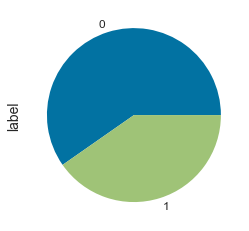

In [563]:
data['label'].value_counts().plot(kind="pie")

The dataset is imbalanced with more images non-malignant/benign cases rather than those that are malignant.

 #### 0 - No cancer cells, 1 - Cancer cells

In [564]:
m = data.loc[data['label']==1] # malignant
nm = data.loc[data['label']==0] # non-malignant

In [565]:
# to sample as many random images as possible (so 89117 is the least of the two values) and ensure the tranining set has equal number of of 0 and 1 cases
custom_image_data = pd.concat([m.sample(vc[1],random_state=42), nm.sample(vc[1],random_state=42)], axis=0, ignore_index=True).reset_index()
custom_image_data['label'].value_counts() # to verify the process 

1    2015
0    2015
Name: label, dtype: int64

In [566]:
custom_image_data.columns

Index(['index', 'path', 'id', 'label'], dtype='object')

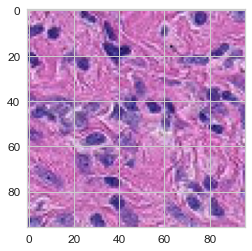

In [567]:
img = mpimg.imread(f'train/{custom_image_data.iloc[0][2]}.tif') # to read image data
imgplot = plt.imshow(img)

In [568]:
# read images from files
custom_image_data['image'] = custom_image_data['path'].map(imread)
custom_image_data.head()

index                                               path  \
0      0  train\0d0d806f2899e4be15eca3a0b4459534887a0252...   
1      1  train\0b266b0794520b9cc0a4895c36ac88994e649168...   
2      2  train\0ac16cbe61771f5092293467c9755d30d5696e59...   
3      3  train\0dae394163423c95d14b00874634ccd9459130b7...   
4      4  train\0ad66f607ce3d3a186fea3d1ca420730b3afe542...   

                                         id  label  \
0  0d0d806f2899e4be15eca3a0b4459534887a0252      1   
1  0b266b0794520b9cc0a4895c36ac88994e649168      1   
2  0ac16cbe61771f5092293467c9755d30d5696e59      1   
3  0dae394163423c95d14b00874634ccd9459130b7      1   
4  0ad66f607ce3d3a186fea3d1ca420730b3afe542      1   

                                               image  
0  [[[236, 182, 205], [255, 200, 231], [208, 139,...  
1  [[[124, 80, 141], [131, 87, 146], [143, 100, 1...  
2  [[[109, 60, 89], [229, 178, 211], [255, 212, 2...  
3  [[[110, 45, 137], [133, 76, 153], [224, 184, 2...  
4  [[[212, 129, 207], [204, 125, 206], [176, 103,...

In [569]:
input_images = np.stack(list(custom_image_data.image), axis = 0)
input_images.shape

(4030, 96, 96, 3)

In [570]:
# Trau=in Test split of 80-20
train_fraction = 0.8

encoder = LabelBinarizer()
y = encoder.fit_transform(custom_image_data.label)
x = input_images

train_tensors, test_tensors, train_targets, test_targets =\
    train_test_split(x, y, train_size = train_fraction, random_state = 42)

val_size = int(0.5*len(test_tensors))


val_tensors = test_tensors[:val_size]
val_targets = test_targets[:val_size]
test_tensors = test_tensors[val_size:]
test_targets = test_targets[val_size:]

In [571]:
# 10 KFold Cross Validation of model
num_folds = 10

# Merge inputs and targets
inputs = np.concatenate((train_tensors, test_tensors), axis=0)
targets = np.concatenate((train_targets, test_targets), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
for train, test in kfold.split(inputs, targets):    

    model = Sequential()
    model.add(Dense(30, activation='relu', input_shape=(96, 96, 3)))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(30, activation='sigmoid'))
    model.add(layers.Dropout(0.5))


    model.add(Flatten())
    model.add(Dense(1, activation = 'sigmoid'))

In [572]:
#Model architecture - adam optimizer with 10 epochs and 80 batch size
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs = 10
model.fit(inputs[train], targets[train],
          epochs=epochs, batch_size=80, verbose=1)

Epoch 1/10
41/41 [==============================] - 20s 459ms/step - loss: 15.7478 - accuracy: 0.5335
Epoch 2/10
41/41 [==============================] - 18s 448ms/step - loss: 1.5510 - accuracy: 0.6686
Epoch 3/10
41/41 [==============================] - 19s 455ms/step - loss: 0.5905 - accuracy: 0.7574
Epoch 4/10
41/41 [==============================] - 19s 460ms/step - loss: 0.5141 - accuracy: 0.7844
Epoch 5/10
41/41 [==============================] - 19s 458ms/step - loss: 0.3498 - accuracy: 0.8579
Epoch 6/10
41/41 [==============================] - 19s 460ms/step - loss: 0.3056 - accuracy: 0.8750
Epoch 7/10
41/41 [==============================] - 19s 458ms/step - loss: 0.2668 - accuracy: 0.8934
Epoch 8/10
41/41 [==============================] - 19s 465ms/step - loss: 0.2179 - accuracy: 0.9173
Epoch 9/10
41/41 [==============================] - 19s 465ms/step - loss: 0.1923 - accuracy: 0.9286
Epoch 10/10
41/41 [==============================] - 19s 461ms/step - loss: 0.1493 - accur

In [573]:
#Evaluation Metrics for testing model performance

cancer_predictions =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]

def evaluate(cancer_predictions):

    test_accuracy = 100*np.sum(np.round(cancer_predictions).astype('int32')==test_targets.flatten())/len(cancer_predictions)
    print('Test accuracy: %.4f%%' % test_accuracy)

    score = roc_auc_score(test_targets, cancer_predictions)

    print('ROC AUC Score: %.4f%%' % score)

    precision = precision_score(np.round(cancer_predictions).astype('int32'), test_targets)
    print('Precision score: %.4f%%' % precision)

    recall = recall_score(np.round(cancer_predictions).astype('int32'), test_targets)
    print('Recall Score: %.4f%%' % recall)

    f1 = f1_score(np.round(cancer_predictions).astype('int32'), test_targets)
    print('F1 Score: %.4f%%' % f1)

    cm = confusion_matrix(np.round(cancer_predictions).astype('int32'), test_targets)
    print("Confusion Matrix: \n %s" % cm)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])

    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    print('Sensitivity Score of the classifier is: ', sensitivity)

    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    print('Specificity Score of the classifier is: ', specificity)

evaluate(cancer_predictions)
    

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 28ms/step
Test accuracy: 95.0372%
ROC AUC Score: 0.9860%
Precision score: 0.9615%
Recall Score: 0.9434%
F1 Score: 0.9524%
Confusion Matrix: 
 [[183   8]
 [ 12 200]]
True positive =  183
False positive =  8
False negative =  12
True negative =  200
Sensitivity Score of the classifier is:  0.9581151832460733
Specificity Score of the classifier is:  0.9433962264150944


#### Experimentation with hyperparameters

In [574]:
#Sequential model architechture
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(96, 96, 3)))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(layers.Dropout(0.5))


model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer= keras.optimizers.SGD(learning_rate = 1e-2), loss='binary_crossentropy', metrics=['accuracy']) #0.01
epochs = 5
model.fit(train_tensors, train_targets, 
          validation_data=(val_tensors, val_targets),
          epochs=epochs, batch_size=50, verbose=1)

Epoch 1/5
65/65 [==============================] - 15s 212ms/step - loss: 3.8539 - accuracy: 0.4984 - val_loss: 0.6957 - val_accuracy: 0.4615
Epoch 2/5
65/65 [==============================] - 13s 206ms/step - loss: 0.7718 - accuracy: 0.5037 - val_loss: 0.7169 - val_accuracy: 0.5385
Epoch 3/5
65/65 [==============================] - 13s 207ms/step - loss: 0.7338 - accuracy: 0.5133 - val_loss: 0.7775 - val_accuracy: 0.4615
Epoch 4/5
65/65 [==============================] - 14s 208ms/step - loss: 0.7237 - accuracy: 0.5037 - val_loss: 0.7593 - val_accuracy: 0.5385
Epoch 5/5
65/65 [==============================] - 14s 209ms/step - loss: 0.7218 - accuracy: 0.4963 - val_loss: 0.7394 - val_accuracy: 0.5385


In [575]:
#Model performance testing using evaluation metrics
cancer_predictions =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]

evaluate(cancer_predictions)

1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step
Test accuracy: 51.6129%
ROC AUC Score: 0.5173%
Precision score: 1.0000%
Recall Score: 0.5161%
F1 Score: 0.6809%
Confusion Matrix: 
 [[  0   0]
 [195 208]]
True positive =  0
False positive =  0
False negative =  195
True negative =  208
Sensitivity Score of the classifier is:  nan
Specificity Score of the classifier is:  0.5161290322580645


C:\Users\arizw\AppData\Local\Temp\ipykernel_3256\1173453086.py:30: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])


In [576]:
# Model architechture - SGD Optimizer , 1e-4 lr, 10 epochs, 10 batch size
model.compile(optimizer= keras.optimizers.SGD(learning_rate = 1e-4), loss='binary_crossentropy', metrics=['accuracy']) 
epochs = 10
model.fit(train_tensors, train_targets, 
          validation_data=(val_tensors, val_targets),
          epochs=epochs, batch_size=10, verbose=1)


Epoch 1/10
323/323 [==============================] - 17s 48ms/step - loss: 0.7078 - accuracy: 0.5087 - val_loss: 0.6950 - val_accuracy: 0.4615
Epoch 2/10
323/323 [==============================] - 15s 47ms/step - loss: 0.7016 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5385
Epoch 3/10
323/323 [==============================] - 15s 47ms/step - loss: 0.7017 - accuracy: 0.4950 - val_loss: 0.6926 - val_accuracy: 0.5757
Epoch 4/10
323/323 [==============================] - 15s 47ms/step - loss: 0.6974 - accuracy: 0.5136 - val_loss: 0.6936 - val_accuracy: 0.4640
Epoch 5/10
323/323 [==============================] - 15s 48ms/step - loss: 0.6985 - accuracy: 0.5043 - val_loss: 0.6972 - val_accuracy: 0.4615
Epoch 6/10
323/323 [==============================] - 15s 48ms/step - loss: 0.6999 - accuracy: 0.5028 - val_loss: 0.6923 - val_accuracy: 0.5931
Epoch 7/10
323/323 [==============================] - 16s 49ms/step - loss: 0.7002 - accuracy: 0.5087 - val_loss: 0.6940 - val_accuracy:

In [577]:
#Model performance testing using evaluation metrics
cancer_predictions =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]
evaluate(cancer_predictions)

1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step
Test accuracy: 48.3871%
ROC AUC Score: 0.5392%
Precision score: 0.0000%
Recall Score: 0.0000%
F1 Score: 0.0000%
Confusion Matrix: 
 [[195 208]
 [  0   0]]
True positive =  195
False positive =  208
False negative =  0
True negative =  0
Sensitivity Score of the classifier is:  0.4838709677419355
Specificity Score of the classifier is:  nan


C:\Users\arizw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arizw\AppData\Local\Temp\ipykernel_3256\1173453086.py:33: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])


In [578]:
#model architechture - reduced layers with adam optimizer
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(96, 96, 3)))
model.add(layers.Dropout(0.5))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs = 5
model.fit(train_tensors, train_targets, 
          validation_data=(val_tensors, val_targets),
          epochs=epochs, batch_size=80, verbose=1)

Epoch 1/5
41/41 [==============================] - 13s 285ms/step - loss: 850.1207 - accuracy: 0.5425 - val_loss: 138.5133 - val_accuracy: 0.6427
Epoch 2/5
41/41 [==============================] - 12s 295ms/step - loss: 114.4091 - accuracy: 0.6247 - val_loss: 58.2153 - val_accuracy: 0.6824
Epoch 3/5
41/41 [==============================] - 12s 299ms/step - loss: 132.0898 - accuracy: 0.6269 - val_loss: 510.1525 - val_accuracy: 0.5409
Epoch 4/5
41/41 [==============================] - 11s 279ms/step - loss: 296.9888 - accuracy: 0.6036 - val_loss: 111.6580 - val_accuracy: 0.6625
Epoch 5/5
41/41 [==============================] - 11s 277ms/step - loss: 77.6686 - accuracy: 0.7103 - val_loss: 51.2186 - val_accuracy: 0.6725


In [579]:
#Model performance testing using evaluation metrics
cancer_predictions =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]
evaluate(cancer_predictions)

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 28ms/step
Test accuracy: 65.7568%
ROC AUC Score: 0.6581%
Precision score: 0.8558%
Recall Score: 0.6224%
F1 Score: 0.7206%
Confusion Matrix: 
 [[ 87  30]
 [108 178]]
True positive =  87
False positive =  30
False negative =  108
True negative =  178
Sensitivity Score of the classifier is:  0.7435897435897436
Specificity Score of the classifier is:  0.6223776223776224


### MultiLayer Perceptron - Train-Test Split


80-20 Split

In [580]:
# our best architecture: 
def bestarch():
    model = Sequential()
    model.add(Dense(30, activation='relu', input_shape=(96, 96, 3)))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(20, activation='sigmoid'))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Dense(2, activation='sigmoid'))
    model.add(layers.Dropout(0.5))


    model.add(Flatten())
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(optimizer= keras.optimizers.SGD(learning_rate = 1e-2), loss='binary_crossentropy', metrics=['accuracy']) #0.01

    return model


def getAcc(cancer_predictions, targets):
    accuracy = 100*np.sum(np.round(cancer_predictions).astype('int32')==targets.flatten())/len(cancer_predictions)
    return accuracy

In [581]:
# 80-20 split
train_fraction = 0.8

encoder = LabelBinarizer()
y = encoder.fit_transform(custom_image_data.label)
x = input_images

train_tensors, test_tensors, train_targets, test_targets =\
    train_test_split(x, y, train_size = train_fraction, random_state = 42)

epochs = 5
class1 =  bestarch()
class1.fit(train_tensors, train_targets, epochs=epochs, batch_size=50, verbose=1)


cancer_predictions =  [class1.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in train_tensors]

getAcc(cancer_predictions, train_targets)


cancer_predictions =  [class1.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]

getAcc(cancer_predictions, test_targets)

evaluate(cancer_predictions)

Epoch 1/5
65/65 [==============================] - 15s 203ms/step - loss: 2.5684 - accuracy: 0.4876
Epoch 2/5
65/65 [==============================] - 13s 202ms/step - loss: 0.7629 - accuracy: 0.4935
Epoch 3/5
65/65 [==============================] - 13s 201ms/step - loss: 0.7211 - accuracy: 0.5022
Epoch 4/5
65/65 [==============================] - 13s 202ms/step - loss: 0.7251 - accuracy: 0.4811
Epoch 5/5
1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step
Test accuracy: 47.2705%
ROC AUC Score: 0.5407%
Precision score: 0.0000%
Recall Score: 0.0000%
F1 Score: 0.0000%
Confusion Matrix: 
 [[381 425]
 [  0   0]]
True positive =  381
False positive =  425
False negative =  0
True negative =  0
Sensitivity Score of the classifier is:  0.47270471464019853
Specificity Score of the classifier is:  nan


C:\Users\arizw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arizw\AppData\Local\Temp\ipykernel_3256\1173453086.py:33: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])


50-50 Split

In [582]:
# 50-50 split
train_fraction = 0.5


train_tensors, test_tensors, train_targets, test_targets =\
    train_test_split(x, y, train_size = train_fraction, random_state = 42)

epochs = 5
class2 =  bestarch()
class2.fit(train_tensors, train_targets, epochs=epochs, batch_size=50, verbose=1)


cancer_predictions =  [class2.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in train_tensors]

getAcc(cancer_predictions, train_targets)


cancer_predictions =  [class2.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]

getAcc(cancer_predictions, test_targets)

evaluate(cancer_predictions)

Epoch 1/5
41/41 [==============================] - 11s 206ms/step - loss: 1.0485 - accuracy: 0.5092
Epoch 2/5
41/41 [==============================] - 9s 225ms/step - loss: 0.7790 - accuracy: 0.4953
Epoch 3/5
41/41 [==============================] - 10s 237ms/step - loss: 0.7384 - accuracy: 0.4903
Epoch 4/5
41/41 [==============================] - 9s 231ms/step - loss: 0.7132 - accuracy: 0.5216
Epoch 5/5
1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 30ms/step
Test accuracy: 49.1811%
ROC AUC Score: 0.5430%
Precision score: 0.0000%
Recall Score: 0.0000%
F1 Score: 0.0000%
Confusion Matrix: 
 [[ 991 1024]
 [   0    0]]
True positive =  991
False positive =  1024
False negative =  0
True negative =  0
Sensitivity Score of the classifier is:  0.49181141439205955
Specificity Score of the classifier is:  nan


C:\Users\arizw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arizw\AppData\Local\Temp\ipykernel_3256\1173453086.py:33: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])


20-80 Split

In [583]:
# 20-80 split
train_fraction = 0.2

train_tensors, test_tensors, train_targets, test_targets =\
    train_test_split(x, y, train_size = train_fraction, random_state = 42)

epochs = 5
class3 =  bestarch()
class3.fit(train_tensors, train_targets, epochs=epochs, batch_size=50, verbose=1)


cancer_predictions =  [class3.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in train_tensors]

getAcc(cancer_predictions,train_targets)


cancer_predictions =  [class3.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]

getAcc(cancer_predictions, test_targets)

evaluate(cancer_predictions)

Epoch 1/5
17/17 [==============================] - 5s 213ms/step - loss: 3.3536 - accuracy: 0.4814
Epoch 2/5
17/17 [==============================] - 3s 201ms/step - loss: 1.5025 - accuracy: 0.4578
Epoch 3/5
17/17 [==============================] - 3s 203ms/step - loss: 0.8691 - accuracy: 0.5124
Epoch 4/5
17/17 [==============================] - 4s 209ms/step - loss: 0.7047 - accuracy: 0.5223
Epoch 5/5
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 38ms/step
Test accuracy: 49.5037%
ROC AUC Score: 0.4996%
Precision score: 0.0000%
Recall Score: 0.0000%
F1 Score: 0.0000%
Confusion Matrix: 
 [[1596 1628]
 [   0    0]]
True positive =  1596
False positive =  1628
False negative =  0
True negative =  0
Sensitivity Score of the classifier is:  0.49503722084367247
Specificity Score of the classifier is:  nan


C:\Users\arizw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arizw\AppData\Local\Temp\ipykernel_3256\1173453086.py:33: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])


In [584]:
# Model architecture experimentation
np.random.seed(42)

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)
checkpointer = ModelCheckpoint(filepath='weights.hdf5', 
                               verbose=1, save_best_only=True)

def backbone():
    model = Sequential()
    model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (96, 96, 3)))
    model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size = 3)) 

    model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
    model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
    model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size = 3)) 

    model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size = 3))

    model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'elu'))
    model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'elu'))
    model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'elu'))

    model.add(Flatten())
    model.add(Dense(1, activation = 'sigmoid')) 

    return model

model = backbone()

In [585]:
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs = 5
model.fit(train_tensors, train_targets, 
          validation_data=(val_tensors, val_targets),
          epochs=epochs, batch_size=80, verbose=1)

Epoch 1/5
11/11 [==============================] - 17s 1s/step - loss: 2.2598 - accuracy: 0.5050 - val_loss: 0.6955 - val_accuracy: 0.5385
Epoch 2/5
11/11 [==============================] - 11s 1s/step - loss: 0.7245 - accuracy: 0.5186 - val_loss: 0.6932 - val_accuracy: 0.4615
Epoch 3/5
11/11 [==============================] - 11s 1s/step - loss: 0.6313 - accuracy: 0.6266 - val_loss: 0.6150 - val_accuracy: 0.7047
Epoch 4/5
11/11 [==============================] - 11s 1s/step - loss: 0.5711 - accuracy: 0.7196 - val_loss: 0.5786 - val_accuracy: 0.7395
Epoch 5/5
11/11 [==============================] - 11s 1s/step - loss: 0.5199 - accuracy: 0.7519 - val_loss: 0.5913 - val_accuracy: 0.7196


In [586]:
cancer_predictions =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]
evaluate(cancer_predictions)

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 39ms/step
Test accuracy: 74.8449%
ROC AUC Score: 0.8466%
Precision score: 0.6007%
Recall Score: 0.8586%
F1 Score: 0.7069%
Confusion Matrix: 
 [[1435  650]
 [ 161  978]]
True positive =  1435
False positive =  650
False negative =  161
True negative =  978
Sensitivity Score of the classifier is:  0.6882494004796164
Specificity Score of the classifier is:  0.858647936786655


Conclusions:
- Architecture 4 consists of 4 layers, 5 epochs, 80 as the batch size, uses the Adam optimization algorithm and a learning rate of 0.001. It performs just slightly better than Architecture 1 which has the same architecture except for the number of layers. Thus, we can conclude that decreasing the number of layers leads to a better accuracy. This is because reducing the number of layers deactivates the neurons that could contribute to overfitting.  
- 10 fold cross validation reported better results compared to Train-Test split.
- By increasing the number of instances in our test set, we notice that the validation accuracy starts to stagnate. This means that the model is overfitting.

# Lab 11. Convolutional Neural Network 

### Hyperparameters and Architecture Testing

The Histopathologic Cancer Dataset was used for CNN in this lab, as it was for MLP in lab 10. The model type we have used is Sequential, with Conv2D layers. These convolution layers will deal with our input images as 2-dimensional matrices. To match the output dimension of our network with label dimension, we use MaxPooling2D and Flatten layer after the Dense layer. The model was tested with different hyperparameters and the evaluation metrics were recorded for each.

In [587]:
def backbone2():
    #Architecture 2
    model2 = Sequential()

    # conv block 1
    model2.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (96, 96, 3)))
    model2.add(BatchNormalization())
    model2.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu', use_bias=False))
    model2.add(BatchNormalization())
    model2.add(MaxPooling2D(pool_size = 2)) 
    model2.add(Dropout(0.3))

    # conv block 2
    model2.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu', use_bias=False))
    model2.add(BatchNormalization())
    model2.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu', use_bias=False))
    model2.add(BatchNormalization())
    model2.add(MaxPooling2D(pool_size = 2)) 
    model2.add(Dropout(0.3))

    # conv block 3
    model2.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu', use_bias=False))
    model2.add(BatchNormalization())
    model2.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu', use_bias=False))
    model2.add(BatchNormalization())
    model2.add(MaxPooling2D(pool_size = 2)) 
    model2.add(Dropout(0.3))

    #a fully connected (also called dense) layer at the end
    model2.add(Flatten())
    model2.add(Dense(256, activation = 'relu', use_bias=False))
    model2.add(BatchNormalization())
    model2.add(Dropout(0.5))

    #finally convert to values of 0 to 1 using the sigmoid activation function
    model2.add(Dense(1, activation = "sigmoid"))

    return model2

In [588]:
def backbone3():
        # Architecture 3

        model3 = Sequential()

        # conv block 1
        model3.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (96, 96, 3)))
        model3.add(BatchNormalization())
        model3.add(MaxPooling2D(pool_size = 2)) 

        # conv block 2
        model3.add(Conv2D(filters = 64, kernel_size = 2, activation = 'relu'))
        model3.add(BatchNormalization())
        model3.add(MaxPooling2D(pool_size = 2)) 

        # conv block 3
        model3.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
        model3.add(BatchNormalization())
        model3.add(MaxPooling2D(pool_size = 2)) 

        # conv block 4
        model3.add(Conv2D(filters = 256, kernel_size = 3, activation = 'relu'))
        model3.add(BatchNormalization())
        model3.add(MaxPooling2D(pool_size = 2)) 

        # conv block 5
        model3.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu'))
        model3.add(BatchNormalization())
        model3.add(MaxPooling2D(pool_size = 2)) 

        model3.add(Dropout(0.5))

        return model3



In [589]:
# Backbone 2: 

arch1 = backbone2()
arch1.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(0.0001), metrics=['accuracy'])
arch1.fit(train_tensors, train_targets, validation_data=(val_tensors, val_targets), epochs=15, batch_size=80, verbose=1)
arch2 = backbone2()
arch2.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'])
arch2.fit(train_tensors, train_targets, validation_data=(val_tensors, val_targets), epochs=10, batch_size=80, verbose=1)

# Backbone 3:
arch3 =  backbone3()
arch3.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'])
arch3.fit(train_tensors, train_targets, validation_data=(val_tensors, val_targets), epochs=10, batch_size=80, verbose=1)

arch4 =  backbone3()
arch4.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'])
arch4.fit(train_tensors, train_targets, validation_data=(val_tensors, val_targets), epochs=10, batch_size=80, verbose=1)

# Backbone 1
arch5 = backbone()
arch5.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'])
arch5.fit(train_tensors, train_targets, validation_data=(val_tensors, val_targets), epochs=10, batch_size=80, verbose=1)

arch6 = model

Epoch 1/15
11/11 [==============================] - 28s 2s/step - loss: 0.9035 - accuracy: 0.6030 - val_loss: 2.2404 - val_accuracy: 0.4591
Epoch 2/15
11/11 [==============================] - 22s 2s/step - loss: 0.7192 - accuracy: 0.7134 - val_loss: 1.1893 - val_accuracy: 0.4591
Epoch 3/15
11/11 [==============================] - 22s 2s/step - loss: 0.6474 - accuracy: 0.7444 - val_loss: 0.7259 - val_accuracy: 0.4938
Epoch 4/15
11/11 [==============================] - 22s 2s/step - loss: 0.5897 - accuracy: 0.7345 - val_loss: 0.6464 - val_accuracy: 0.6402
Epoch 5/15
11/11 [==============================] - 23s 2s/step - loss: 0.6565 - accuracy: 0.7208 - val_loss: 0.6677 - val_accuracy: 0.5881
Epoch 6/15
11/11 [==============================] - 22s 2s/step - loss: 0.6658 - accuracy: 0.7333 - val_loss: 0.6950 - val_accuracy: 0.5558
Epoch 7/15
11/11 [==============================] - 22s 2s/step - loss: 0.6075 - accuracy: 0.7481 - val_loss: 0.6845 - val_accuracy: 0.5732
Epoch 8/15
11/11 [==

In [590]:
# Get architecture predictions and evaluate accuracy 

print("ARCH 1 PERFORMANCE")
pred1 =  [arch1.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]
evaluate(pred1)


print("ARCH 2 PERFORMANCE")
pred2 =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]
evaluate(pred2)


print("ARCH 3 PERFORMANCE")
pred3 =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]
evaluate(pred3)


print("ARCH 4 PERFORMANCE")
pred4 =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]
evaluate(pred4)


print("ARCH 5 PERFORMANCE")
pred5 =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]
evaluate(pred5)


print("ARCH 6 PERFORMANCE")
pred6 = cancer_predictions
evaluate(pred6)

ARCH 1 PERFORMANCE
1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 44ms/step
Test accuracy: 56.8548%
ROC AUC Score: 0.7369%
Precision score: 0.9693%
Recall Score: 0.5406%
F1 Score: 0.6941%
Confusion Matrix: 
 [[ 255   50]
 [1341 1578]]
True positive =  255
False positive =  50
False negative =  1341
True negative =  1578
Sensitivity Score of the classifier is:  0.8360655737704918
Specificity Score of the classifier is:  0.5405960945529291
ARCH 2 PERFORMANCE
1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 40ms/step
Test accuracy: 74.8449%
ROC AUC Score: 0.8466%
Precision score: 0.6007%
Recall Score: 0.8586%
F1 Score: 0.7069%
Confusion Matrix: 
 [[1435  650]
 [ 161  978]]
True positive =  1435
False positive =  650
False negative =  161
True negative =  978
Sensitivity Score of the classifier is:  0.6882494004796164
Specificity Score of the classifier is:  0.858647936786655
ARCH 3 PERFORMANCE
1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 52ms/step
Test accuracy: 74.8449%
ROC AUC Score: 0.8466%
Precision score: 0.6007%
Recall Score: 0.8586%
F1 Score: 0.7069%
Confusion Matrix: 
 [[1435  650]
 [ 161  978]]
True positive =  1435
False positive =  650
False negative =  161
True negative =  978
Sensitivity Score of the classifier is:  0.6882494004796164
Specificity Score of the classifier is:  0.858647936786655
ARCH 4 PERFORMANCE
1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 53ms/step
Test accuracy: 74.8449%
ROC AUC Score: 0.8466%
Precision score: 0.6007%
Recall Score: 0.8586%
F1 Score: 0.7069%
Confusion Matrix: 
 [[1435  650]
 [ 161  978]]
True positive =  1435
False positive =  650
False negative =  161
True negative =  978
Sensitivity Score of the classifier is:  0.6882494004796164
Specificity Score of the classifier is:  0.858647936786655
ARCH 5 PERFORMANCE
1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 58ms/step
Test accuracy: 74.8449%
ROC AUC Score: 0.8466%
Precision score: 0.6007%
Recall Score: 0.8586%
F1 Score: 0.7069%
Confusion Matrix: 
 [[1435  650]
 [ 161  978]]
True positive =  1435
False positive =  650
False negative =  161
True negative =  978
Sensitivity Score of the classifier is:  0.6882494004796164
Specificity Score of the classifier is:  0.858647936786655
ARCH 6 PERFORMANCE
Test accuracy: 74.8449%
ROC AUC Score: 0.8466%
Precision score: 0.6007%
Recall Score: 0.8586%
F1 Score: 0.7069%
Confusion Matrix: 
 [[1435  650]
 [ 161  978]]
True positive =  1435
False positive =  650
False negative =  161
True negative =  978
Sensitivity Score of the classifier is:  0.6882494004796164
Specificity Score of the classifier is:  0.858647936786655


## Conclusion:
From the several experiments performed using different CNN architectures and hyperparameters, we observed that backbone 2 i.e., Architectures 1 and 2 worked the best. This could be due to the batch normalisation layers along with dropout and 2dmaxpooling used in each block. However, we noticed that it takes a really long time for computation. So, we regard architecture 3 and 4 to be the next best in terms of accuracy and computation time. They use lesser number of layers but still perform comparable with the best architectures.
.